# Spotify Song Popularity Analysis 
### Team members: Mohammad Sakir, Erin Thomas,  Noor Sadia
In this project, we will be using predictive analysis to predict the popularity of a song based on its list of features from a spotify dataset. In order to achieve this goal, we will be analyzing different spotify audio features of songs and running and evaluating different models to find the most appropriate one suited for our prediction.

## Outline
- [Importing Packages and Libraries](#Importing-Packages-and-Libraries)
- [Loading and Investigating the Raw Data](#Loading-and-Investigating-the-Raw-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Models and Prediction](#Models-and-Prediction)

## Importing Packages and Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

# !pip install lightgbm --> uncomment this line to install lightgbm
# import lightgbm as lgb

import datetime


import warnings 
warnings.filterwarnings("ignore")

## Loading and Investigating the Raw Data

In [3]:
df = pd.read_csv("data.csv")
print(df.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [4]:
print(df.size)

3228271


In [5]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
22780,0.744,['Grupo Laberinto'],0.608,179320,0.3720,0,0fSs5h0qgNp7Rbm0MfZbfV,0.000003,8,0.0387,-8.097,1,La Dama,46,2006-10-02,0.3810,71.592,0.968,2006
161385,0.592,['Melanie Martinez'],0.708,220897,0.6180,1,2plUcsOZm6pi1kFUncqLni,0.000002,7,0.3990,-6.315,1,Wheels on the Bus,69,2019-09-06,0.0390,95.947,0.563,2019
157837,0.514,['Los Bukis'],0.493,170427,0.8300,0,0UTxUXHbo1igrXRnQTTTAE,0.000078,5,0.2530,-9.449,1,Quiéreme Como Soy,35,1984-01-01,0.0394,170.334,0.972,1984
13854,0.814,['Pedro Conga'],0.665,284240,0.7640,0,5rZ4XYvFC48L2fw2rUNc3o,0.000000,0,0.2910,-5.712,0,Me Niegas Tanto Amor,51,1997,0.0396,174.724,0.955,1997
144636,0.995,['Ignacio Corsini'],0.719,140760,0.1550,0,2eipiXUZDAOBephNZEeQPA,0.007780,5,0.1080,-23.459,1,A Mate y Marroco - Remasterizado,0,1930-06-21,0.4590,68.341,0.523,1930
70534,0.164,"['$NOT', 'Wifisfuneral']",0.807,160731,0.5640,1,5Q7mb1K0OF3RkJGy2Zs5fN,0.000000,6,0.0804,-7.938,0,BERETTA (feat. Wifisfuneral),61,2019-09-20,0.3190,96.004,0.225,2019
153464,0.869,"['Richard Wagner', 'Arturo Toscanini']",0.220,675933,0.1470,0,6qDavidkGwp5ySPKYBeNbT,0.769000,10,0.1940,-18.812,1,Dawn and Siegfried's Rhine Journey,0,1936,0.0383,105.085,0.116,1936
119816,0.593,['Gene Vincent & His Blue Caps'],0.616,132907,0.6700,0,73uI3NKaD0DFQ78jAyNGsW,0.000000,7,0.0945,-8.709,1,Cruisin',28,1957-03-04,0.0305,124.309,0.926,1957
109562,0.996,"['Erik Satie', 'Robert Casadesus', 'Gaby Casad...",0.643,113853,0.0511,0,1H5AWKWo6lp2MKiIAUIUnm,0.957000,0,0.0897,-35.678,1,"3 Morceaux en forme de poire, IES 38: 6. En plus",9,1949,0.0426,119.532,0.389,1949
132624,0.460,['Motörhead'],0.233,327448,0.7060,0,7akyedgeVgZeT6oD77nyHn,0.014700,1,0.1590,-7.445,0,Love Me Forever,54,1991-02-26,0.0512,125.428,0.256,1991


### <b>Data Description</b>
    
Following are all the features of our dataset put together based on the Spotify Web API:
    

<b>acousticness:</b> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
<b>artists:</b> The name(s) of the artist(s) who perform the track.
    
<b>danceability:</b> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
<b>duration_ms:</b> A track's duration in milliseconds.
    
<b>energy:</b> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
<b>explicit:</b> Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No.
    
<b>id:</b> Track's unique identifier.
    
<b>instrumentalness:</b> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
<b>key:</b> The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
<b>liveness:</b> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
<b>loudness:</b> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. 
    
<b>mode:</b> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
<b>name:</b> Name of Track
    
<b>popularity:</b> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
<b>release_date:</b> Date of track's release.
    
<b>speechiness:</b> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
<b>tempo:</b> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
<b>valence:</b> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
<b>year:</b> Year of track's release.
    
Data info taken from: [https://github.com/calebelgut/spotify-lstm](https://github.com/calebelgut/spotify-lstm) 

Before getting started, let's get to know our dataset and clean it as we go along.

In [6]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [7]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [8]:
df.shape

(169909, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Removing the track id of the songs because we will not be needing this for our analysis or evaluation.

In [10]:
df.drop(['id'], axis=1, inplace=True)

Changing the popularity and duration type as float to allow easy data processing.

In [11]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

Separating the continuous and categorical features for ease in future analysis.

In [12]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [13]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']
Categorical Columns ->  ['artists', 'name', 'release_date']


In the categorical columns, **artists** are in a list format, which we will represent in a better format during the exploratory analysis, and **name** is not of much importance. The only categorical variable left is **release_date** that needs to be made into a uniform format.

In [14]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648.0,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020


### Making the release_date variable consistent 
Let's start by exploring the release_date feature.
When observing the data in this column, we noticed that this column was populated in different formats. A majority of the rows showed the release date in the year-month-day format. However, many rows also represented this in years only.

In [15]:
df['release_date']

0               1928
1               1928
2               1928
3         1928-09-25
4               1928
             ...    
169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, Length: 169909, dtype: object

In [16]:
count = 0
for ind, dt in df['release_date'].items():
    if len(dt) == 4:
        print(ind, dt)
        count += 1
count

0 1928
1 1928
2 1928
4 1928
5 1928
6 1928
7 1928
9 1928
10 1928
11 1928
12 1928
13 1928
15 1928
16 1928
18 1928
20 1928
22 1928
25 1928
27 1928
28 1928
29 1928
33 1928
35 1928
38 1928
39 1928
40 1928
41 1928
42 1928
44 1928
45 1928
47 1928
49 1928
50 1928
51 1928
54 1928
55 1928
57 1928
62 1928
64 1928
65 1928
66 1928
67 1928
70 1928
72 1928
74 1928
75 1928
76 1928
77 1928
79 1928
80 1928
81 1928
82 1928
83 1928
84 1928
85 1928
86 1928
87 1928
90 1928
91 1928
97 1928
98 1928
112 1930
117 1930
121 1930
130 1930
138 1930
151 1930
157 1930
163 1930
180 1930
199 1930
200 1935
201 1935
202 1935
203 1935
204 1935
206 1935
210 1935
211 1935
212 1935
214 1935
215 1935
216 1935
217 1935
218 1935
221 1935
222 1935
223 1935
224 1935
225 1935
226 1935
228 1935
229 1935
230 1935
231 1935
232 1935
233 1935
234 1935
236 1935
237 1935
239 1935
240 1935
241 1935
242 1935
245 1935
246 1935
247 1935
248 1935
249 1935
254 1935
255 1935
256 1935
257 1935
258 1935
260 1935
262 1935
263 1935
265 1935
267 193

1942 1958
1944 1958
1946 1958
1948 1958
1956 1959
1959 1959
1961 1959
1964 1959
1965 1959
1967 1959
1973 1959
1974 1959
1977 1959
1978 1959
1979 1959
1981 1959
1982 1959
1985 1959
1989 1959
1992 1959
1993 1959
1995 1959
1997 1959
1999 1959
2002 1959
2003 1959
2009 1959
2010 1959
2011 1959
2014 1959
2015 1959
2016 1959
2017 1959
2018 1959
2019 1959
2020 1959
2022 1959
2023 1959
2024 1959
2025 1959
2026 1959
2027 1959
2030 1959
2034 1959
2040 1959
2041 1959
2042 1959
2048 1959
2050 1959
2051 1959
2052 1959
2055 1960
2057 1960
2058 1960
2060 1960
2062 1960
2064 1960
2076 1960
2079 1960
2081 1960
2083 1960
2086 1960
2093 1960
2095 1960
2099 1960
2106 1960
2108 1960
2109 1960
2110 1960
2111 1960
2113 1960
2114 1960
2115 1960
2119 1960
2120 1960
2126 1960
2127 1960
2133 1960
2136 1960
2137 1960
2138 1960
2139 1960
2140 1960
2143 1960
2146 1960
2148 1960
2151 1960
2159 1961
2160 1961
2163 1961
2164 1961
2166 1961
2167 1961
2170 1961
2172 1961
2186 1961
2187 1961
2190 1961
2191 1961
2193 1961


4577 1985
4579 1985
4587 1985
4591 1985
4598 1985
4600 1985
4601 1985
4605 1985
4606 1985
4610 1985
4611 1985
4624 1985
4636 1985
4638 1985
4639 1985
4641 1985
4645 1985
4649 1985
4650 1985
4652 1985
4653 1985
4657 1986
4658 1986
4660 1986
4665 1986
4672 1986
4676 1986
4679 1986
4680 1986
4684 1986
4686 1986
4689 1986
4690 1986
4691 1986
4696 1986
4697 1986
4698 1986
4699 1986
4701 1986
4703 1986
4711 1986
4713 1986
4715 1986
4717 1986
4722 1986
4724 1986
4727 1986
4731 1986
4734 1986
4738 1986
4746 1986
4747 1986
4752 1986
4754 1987
4756 1987
4757 1987
4766 1987
4776 1987
4786 1987
4789 1987
4790 1987
4791 1987
4792 1987
4797 1987
4798 1987
4800 1987
4806 1987
4814 1987
4815 1987
4817 1987
4820 1987
4821 1987
4826 1987
4828 1987
4831 1987
4832 1987
4837 1987
4838 1987
4840 1987
4845 1987
4846 1987
4854 1988
4858 1988
4863 1988
4864 1988
4865 1988
4868 1988
4873 1988
4875 1988
4879 1988
4886 1988
4890 1988
4891 1988
4892 1988
4895 1988
4896 1988
4901 1988
4903 1988
4908 1988
4911 1988


9414 1952
9420 1952
9422 1952
9424 1952
9425 1952
9427 1952
9430 1952
9434 1952
9437 1953
9438 1953
9441 1953
9442 1953
9443 1953
9444 1953
9445 1953
9446 1953
9449 1953
9450 1953
9452 1953
9453 1953
9456 1953
9457 1953
9459 1953
9461 1953
9462 1953
9463 1953
9464 1953
9466 1953
9467 1953
9469 1953
9471 1953
9472 1953
9473 1953
9474 1953
9478 1953
9480 1953
9483 1953
9488 1953
9491 1953
9501 1953
9502 1953
9503 1953
9504 1953
9506 1953
9507 1953
9508 1953
9509 1953
9515 1953
9517 1953
9518 1953
9520 1953
9522 1953
9525 1953
9526 1953
9528 1953
9530 1953
9531 1953
9535 1953
9536 1953
9538 1954
9539 1954
9540 1954
9544 1954
9547 1954
9548 1954
9549 1954
9550 1954
9551 1954
9553 1954
9554 1954
9557 1954
9561 1954
9562 1954
9563 1954
9564 1954
9565 1954
9566 1954
9570 1954
9571 1954
9573 1954
9574 1954
9577 1954
9579 1954
9584 1954
9585 1954
9591 1954
9592 1954
9593 1954
9595 1954
9598 1954
9600 1954
9604 1954
9605 1954
9607 1954
9608 1954
9610 1954
9614 1954
9619 1954
9623 1954
9624 1954


12094 1979
12095 1979
12096 1979
12100 1979
12106 1979
12108 1979
12111 1979
12112 1979
12115 1979
12117 1979
12122 1979
12130 1979
12133 1979
12135 1979
12136 1979
12139 1980
12140 1980
12141 1980
12146 1980
12152 1980
12156 1980
12158 1980
12159 1980
12161 1980
12165 1980
12167 1980
12168 1980
12171 1980
12175 1980
12179 1980
12181 1980
12183 1980
12186 1980
12189 1980
12193 1980
12196 1980
12198 1980
12201 1980
12205 1980
12206 1980
12214 1980
12215 1980
12217 1980
12220 1980
12224 1980
12225 1980
12232 1980
12238 1981
12240 1981
12245 1981
12249 1981
12250 1981
12251 1981
12260 1981
12263 1981
12264 1981
12265 1981
12266 1981
12267 1981
12269 1981
12270 1981
12281 1981
12283 1981
12284 1981
12290 1981
12291 1981
12292 1981
12293 1981
12294 1981
12295 1981
12297 1981
12299 1981
12302 1981
12303 1981
12306 1981
12309 1981
12312 1981
12314 1981
12318 1981
12325 1981
12330 1981
12332 1981
12333 1981
12334 1981
12335 1981
12342 1982
12347 1982
12348 1982
12352 1982
12354 1982
12355 1982

16417 1935
16418 1935
16420 1935
16421 1935
16422 1935
16425 1935
16426 1935
16427 1935
16431 1935
16433 1935
16434 1935
16435 1935
16436 1935
16439 1940
16442 1940
16443 1940
16445 1940
16447 1940
16450 1940
16453 1940
16454 1940
16455 1940
16461 1940
16464 1940
16467 1940
16470 1940
16479 1940
16480 1940
16484 1940
16488 1940
16490 1940
16491 1940
16493 1940
16502 1940
16503 1940
16507 1940
16509 1940
16514 1940
16521 1940
16523 1940
16528 1940
16539 1942
16540 1942
16541 1942
16544 1942
16545 1942
16550 1942
16551 1942
16553 1942
16557 1942
16559 1942
16567 1942
16573 1942
16574 1942
16576 1942
16578 1942
16583 1942
16587 1942
16589 1942
16590 1942
16591 1942
16593 1942
16595 1942
16615 1942
16616 1942
16617 1942
16620 1942
16621 1942
16628 1942
16629 1942
16633 1942
16637 1945
16638 1945
16639 1945
16640 1945
16641 1945
16642 1945
16644 1945
16645 1945
16647 1945
16648 1945
16649 1945
16650 1945
16652 1945
16654 1945
16655 1945
16657 1945
16658 1945
16660 1945
16661 1945
16664 1945

18080 1959
18081 1959
18082 1959
18092 1959
18096 1959
18097 1959
18099 1959
18101 1959
18107 1959
18110 1959
18114 1959
18115 1959
18117 1959
18118 1959
18120 1959
18121 1959
18124 1959
18125 1959
18126 1959
18128 1959
18130 1959
18131 1959
18134 1959
18140 1960
18141 1960
18142 1960
18143 1960
18146 1960
18152 1960
18154 1960
18155 1960
18156 1960
18161 1960
18164 1960
18166 1960
18167 1960
18169 1960
18170 1960
18171 1960
18172 1960
18174 1960
18176 1960
18181 1960
18183 1960
18184 1960
18185 1960
18188 1960
18191 1960
18198 1960
18200 1960
18202 1960
18207 1960
18210 1960
18214 1960
18216 1960
18217 1960
18220 1960
18221 1960
18224 1960
18227 1960
18228 1960
18229 1960
18230 1960
18232 1960
18237 1961
18240 1961
18242 1961
18243 1961
18245 1961
18248 1961
18253 1961
18255 1961
18260 1961
18264 1961
18266 1961
18267 1961
18274 1961
18275 1961
18279 1961
18280 1961
18283 1961
18284 1961
18289 1961
18290 1961
18291 1961
18292 1961
18299 1961
18304 1961
18306 1961
18307 1961
18308 1961

22532 2003
22538 2004
22561 2004
22562 2004
22564 2004
22566 2004
22577 2004
22585 2004
22586 2004
22588 2004
22600 2004
22624 2004
22627 2004
22634 2004
22637 2005
22642 2005
22646 2005
22648 2005
22652 2005
22665 2005
22680 2005
22681 2005
22683 2005
22685 2005
22715 2005
22718 2005
22720 2005
22726 2005
22729 2005
22738 2006
22742 2006
22744 2006
22753 2006
22761 2006
22779 2006
22787 2006
22790 2006
22813 2006
22827 2006
22831 2006
22833 2006
22836 2006
22837 2007
22840 2007
22845 2007
22894 2007
22895 2007
22918 2007
22922 2007
22924 2007
22925 2007
22927 2007
22951 2008
22952 2008
22954 2008
22963 2008
22966 2008
22970 2008
22981 2008
22986 2008
22999 2008
23005 2008
23009 2008
23027 2008
23029 2008
23033 2008
23058 2009
23111 2009
23142 2010
23156 2010
23180 2010
23188 2010
23231 2010
23236 2010
23243 2011
23250 2011
23264 2011
23289 2011
23290 2011
23294 2011
23301 2011
23307 2011
23314 2011
23333 2011
23340 2012
23372 2012
23384 2012
23414 2012
23419 2012
23438 2013
23441 2013

25644 1955
25645 1955
25646 1955
25648 1955
25650 1955
25661 1955
25662 1955
25670 1955
25673 1955
25678 1955
25679 1955
25683 1955
25686 1955
25689 1955
25691 1955
25692 1955
25693 1955
25694 1955
25695 1955
25698 1955
25700 1955
25701 1955
25702 1955
25703 1955
25708 1955
25709 1955
25712 1955
25713 1955
25722 1955
25723 1955
25733 1955
25736 1955
25738 1956
25740 1956
25741 1956
25743 1956
25745 1956
25746 1956
25747 1956
25750 1956
25752 1956
25753 1956
25755 1956
25756 1956
25757 1956
25758 1956
25762 1956
25763 1956
25765 1956
25766 1956
25767 1956
25769 1956
25770 1956
25773 1956
25776 1956
25781 1956
25783 1956
25788 1956
25790 1956
25792 1956
25793 1956
25794 1956
25795 1956
25796 1956
25797 1956
25801 1956
25804 1956
25805 1956
25810 1956
25811 1956
25813 1956
25814 1956
25815 1956
25816 1956
25819 1956
25821 1956
25823 1956
25824 1956
25825 1956
25827 1956
25828 1956
25830 1956
25831 1956
25832 1956
25833 1956
25835 1956
25836 1956
25841 1957
25844 1957
25845 1957
25847 1957

29341 1992
29345 1992
29349 1992
29357 1992
29360 1992
29377 1992
29379 1992
29383 1992
29384 1992
29386 1992
29419 1992
29426 1992
29429 1992
29438 1993
29444 1993
29445 1993
29448 1993
29457 1993
29460 1993
29465 1993
29467 1993
29469 1993
29472 1993
29473 1993
29479 1993
29480 1993
29481 1993
29482 1993
29483 1993
29485 1993
29486 1993
29496 1993
29512 1993
29522 1993
29524 1993
29525 1993
29531 1993
29537 1994
29540 1994
29551 1994
29553 1994
29556 1994
29557 1994
29558 1994
29564 1994
29570 1994
29575 1994
29578 1994
29579 1994
29588 1994
29590 1994
29591 1994
29594 1994
29597 1994
29606 1994
29608 1994
29624 1994
29625 1994
29626 1994
29637 1995
29639 1995
29643 1995
29644 1995
29645 1995
29650 1995
29654 1995
29658 1995
29659 1995
29662 1995
29663 1995
29675 1995
29676 1995
29677 1995
29679 1995
29680 1995
29690 1995
29700 1995
29715 1995
29717 1995
29721 1995
29722 1995
29726 1995
29728 1995
29736 1995
29738 1996
29746 1996
29747 1996
29752 1996
29753 1996
29758 1996
29759 1996

34689 1965
34694 1965
34701 1965
34702 1965
34704 1965
34709 1965
34711 1965
34713 1965
34717 1965
34719 1965
34720 1965
34723 1965
34725 1965
34731 1965
34732 1965
34736 1965
34737 1966
34738 1966
34740 1966
34743 1966
34748 1966
34750 1966
34751 1966
34752 1966
34753 1966
34754 1966
34755 1966
34756 1966
34767 1966
34769 1966
34770 1966
34772 1966
34773 1966
34777 1966
34778 1966
34780 1966
34781 1966
34786 1966
34788 1966
34789 1966
34793 1966
34794 1966
34799 1966
34803 1966
34805 1966
34806 1966
34809 1966
34810 1966
34811 1966
34812 1966
34813 1966
34817 1966
34820 1966
34826 1966
34828 1966
34837 1967
34839 1967
34846 1967
34859 1967
34871 1967
34872 1967
34873 1967
34874 1967
34876 1967
34877 1967
34879 1967
34881 1967
34882 1967
34884 1967
34889 1967
34895 1967
34899 1967
34903 1967
34907 1967
34909 1967
34910 1967
34911 1967
34921 1967
34923 1967
34926 1967
34931 1967
34935 1967
34940 1968
34942 1968
34945 1968
34946 1968
34948 1968
34951 1968
34957 1968
34961 1968
34962 1968

40633 1945
40634 1945
40635 1945
40637 1945
40638 1945
40639 1945
40640 1945
40645 1945
40647 1945
40648 1945
40649 1945
40651 1945
40652 1945
40653 1945
40654 1945
40656 1945
40657 1945
40658 1945
40659 1945
40660 1945
40661 1945
40662 1945
40663 1945
40664 1945
40666 1945
40667 1945
40668 1945
40669 1945
40672 1945
40673 1945
40674 1945
40675 1945
40676 1945
40677 1945
40678 1945
40680 1945
40681 1945
40682 1945
40683 1945
40685 1945
40686 1945
40687 1945
40689 1945
40691 1945
40693 1945
40694 1945
40696 1945
40697 1945
40698 1945
40700 1946
40702 1947
40705 1947
40706 1947
40707 1947
40710 1947
40711 1947
40712 1947
40713 1947
40714 1947
40715 1947
40716 1947
40717 1947
40718 1947
40719 1947
40720 1947
40721 1947
40722 1947
40723 1947
40724 1947
40725 1947
40726 1947
40727 1947
40728 1947
40729 1947
40730 1947
40731 1947
40732 1947
40733 1947
40734 1947
40735 1947
40736 1947
40737 1947
40738 1947
40739 1947
40740 1947
40741 1947
40742 1947
40743 1947
40744 1947
40745 1947
40746 1947

43606 1976
43609 1976
43610 1976
43611 1976
43612 1976
43616 1976
43617 1976
43619 1976
43622 1976
43623 1976
43633 1976
43634 1976
43635 1976
43638 1976
43640 1976
43642 1976
43644 1976
43645 1976
43647 1976
43648 1976
43649 1976
43650 1976
43654 1976
43655 1976
43660 1976
43668 1976
43671 1976
43675 1976
43679 1976
43680 1976
43684 1977
43688 1977
43691 1977
43694 1977
43701 1977
43709 1977
43714 1977
43723 1977
43724 1977
43726 1977
43732 1977
43735 1977
43736 1977
43740 1977
43742 1977
43743 1977
43744 1977
43750 1977
43755 1977
43756 1977
43758 1977
43764 1977
43766 1977
43767 1977
43775 1977
43776 1977
43780 1977
43782 1978
43783 1978
43784 1978
43787 1978
43789 1978
43796 1978
43799 1978
43803 1978
43805 1978
43807 1978
43808 1978
43809 1978
43810 1978
43811 1978
43813 1978
43814 1978
43817 1978
43818 1978
43821 1978
43822 1978
43823 1978
43826 1978
43827 1978
43828 1978
43840 1978
43841 1978
43842 1978
43843 1978
43844 1978
43848 1978
43852 1978
43853 1978
43854 1978
43855 1978

48999 1954
49002 1954
49006 1954
49007 1954
49008 1954
49009 1954
49014 1954
49015 1954
49019 1954
49020 1954
49026 1954
49027 1954
49030 1954
49032 1954
49035 1954
49036 1954
49037 1954
49038 1954
49041 1954
49050 1954
49051 1954
49055 1954
49056 1954
49059 1954
49067 1954
49068 1954
49071 1954
49072 1954
49073 1954
49074 1954
49075 1954
49081 1954
49082 1954
49083 1954
49084 1954
49085 1954
49087 1955
49088 1955
49089 1955
49090 1955
49091 1955
49092 1955
49093 1955
49094 1955
49095 1955
49101 1955
49102 1955
49104 1955
49107 1955
49109 1955
49128 1955
49130 1955
49131 1955
49133 1955
49134 1955
49135 1955
49138 1955
49139 1955
49143 1955
49144 1955
49146 1955
49148 1955
49150 1955
49152 1955
49154 1955
49155 1955
49156 1955
49157 1955
49159 1955
49162 1955
49163 1955
49164 1955
49165 1955
49166 1955
49167 1955
49170 1955
49171 1955
49172 1955
49175 1955
49176 1955
49180 1955
49181 1955
49188 1956
49192 1956
49193 1956
49196 1956
49197 1956
49200 1956
49202 1956
49206 1956
49207 1956

53038 1994
53041 1994
53043 1994
53045 1994
53049 1994
53050 1994
53065 1994
53066 1994
53068 1994
53069 1994
53070 1994
53073 1994
53076 1994
53078 1994
53079 1994
53082 1994
53085 1994
53086 1995
53095 1995
53099 1995
53100 1995
53106 1995
53117 1995
53121 1995
53122 1995
53125 1995
53128 1995
53132 1995
53133 1995
53155 1995
53158 1995
53163 1995
53165 1995
53176 1995
53179 1995
53180 1995
53184 1995
53195 1996
53199 1996
53211 1996
53216 1996
53219 1996
53220 1996
53224 1996
53240 1996
53243 1996
53247 1996
53249 1996
53250 1996
53252 1996
53253 1996
53256 1996
53262 1996
53274 1996
53305 1997
53315 1997
53321 1997
53327 1997
53331 1997
53332 1997
53336 1997
53340 1997
53347 1997
53352 1997
53363 1997
53381 1997
53399 1998
53401 1998
53406 1998
53415 1998
53416 1998
53417 1998
53419 1998
53421 1998
53426 1998
53440 1998
53448 1998
53453 1998
53455 1998
53456 1998
53463 1998
53464 1998
53496 1999
53500 1999
53504 1999
53508 1999
53514 1999
53516 1999
53517 1999
53520 1999
53522 1999

57805 1966
57806 1966
57807 1966
57811 1966
57813 1966
57814 1966
57816 1966
57821 1966
57825 1966
57828 1966
57831 1966
57841 1966
57844 1966
57846 1966
57850 1966
57851 1966
57854 1966
57855 1966
57857 1966
57860 1966
57862 1966
57865 1966
57873 1966
57879 1966
57881 1966
57893 1967
57895 1967
57896 1967
57914 1967
57915 1967
57919 1967
57922 1967
57924 1967
57925 1967
57927 1967
57930 1967
57934 1967
57936 1967
57940 1967
57943 1967
57946 1967
57949 1967
57958 1967
57959 1967
57960 1967
57961 1967
57965 1967
57966 1967
57968 1967
57972 1967
57974 1967
57976 1967
57977 1967
57980 1967
57985 1967
57988 1968
57989 1968
57991 1968
57992 1968
57993 1968
57995 1968
57997 1968
57998 1968
57999 1968
58004 1968
58005 1968
58007 1968
58009 1968
58012 1968
58014 1968
58016 1968
58017 1968
58019 1968
58024 1968
58032 1968
58039 1968
58040 1968
58042 1968
58044 1968
58045 1968
58046 1968
58048 1968
58049 1968
58051 1968
58053 1968
58054 1968
58057 1968
58058 1968
58059 1968
58060 1968
58062 1968

63312 1945
63313 1945
63314 1945
63315 1945
63316 1945
63317 1945
63318 1945
63319 1945
63321 1945
63322 1945
63324 1945
63325 1945
63326 1945
63328 1945
63329 1945
63332 1945
63333 1945
63334 1945
63336 1945
63337 1945
63338 1945
63339 1945
63341 1945
63343 1945
63344 1945
63345 1945
63346 1945
63347 1945
63348 1945
63349 1945
63350 1945
63351 1945
63352 1945
63353 1945
63354 1945
63355 1945
63356 1945
63357 1945
63358 1945
63359 1945
63361 1945
63362 1945
63363 1945
63364 1945
63365 1945
63366 1945
63367 1945
63368 1945
63369 1945
63370 1945
63371 1945
63372 1945
63373 1945
63374 1945
63375 1945
63376 1945
63377 1945
63378 1945
63379 1945
63380 1945
63381 1945
63384 1945
63385 1945
63386 1945
63387 1945
63388 1945
63389 1945
63390 1945
63391 1945
63392 1945
63393 1945
63395 1945
63397 1945
63398 1945
63399 1945
63400 1948
63401 1948
63402 1948
63403 1948
63404 1948
63406 1948
63408 1948
63409 1948
63410 1948
63411 1948
63413 1948
63418 1948
63419 1948
63423 1948
63425 1948
63426 1948

66764 1981
66770 1982
66774 1982
66779 1982
66781 1982
66783 1982
66791 1982
66794 1982
66795 1982
66803 1982
66809 1982
66810 1982
66811 1982
66812 1982
66813 1982
66814 1982
66819 1982
66825 1982
66829 1982
66831 1982
66832 1982
66835 1982
66838 1982
66843 1982
66844 1982
66845 1982
66848 1982
66849 1982
66851 1982
66856 1982
66859 1982
66861 1982
66863 1982
66865 1982
66867 1982
66871 1983
66877 1983
66878 1983
66879 1983
66883 1983
66886 1983
66889 1983
66891 1983
66893 1983
66898 1983
66900 1983
66903 1983
66905 1983
66906 1983
66907 1983
66916 1983
66917 1983
66924 1983
66928 1983
66933 1983
66934 1983
66941 1983
66944 1983
66946 1983
66949 1983
66951 1983
66952 1983
66957 1983
66959 1983
66960 1983
66964 1983
66967 1983
66973 1984
66974 1984
66978 1984
66979 1984
66981 1984
66983 1984
66984 1984
66986 1984
66990 1984
66992 1984
66994 1984
66995 1984
67004 1984
67009 1984
67011 1984
67013 1984
67019 1984
67020 1984
67021 1984
67025 1984
67028 1984
67037 1984
67038 1984
67043 1984

72489 1965
72494 1965
72497 1965
72498 1965
72504 1965
72505 1965
72508 1965
72509 1965
72511 1965
72512 1965
72513 1965
72514 1965
72516 1965
72518 1965
72525 1965
72527 1965
72528 1965
72529 1965
72532 1965
72539 1965
72540 1965
72543 1965
72548 1965
72550 1965
72551 1965
72553 1965
72556 1965
72558 1965
72563 1965
72566 1965
72573 1966
72575 1966
72577 1966
72579 1966
72585 1966
72587 1966
72590 1966
72602 1966
72603 1966
72612 1966
72615 1966
72627 1966
72629 1966
72630 1966
72633 1966
72641 1966
72642 1966
72645 1966
72646 1966
72650 1966
72652 1966
72656 1966
72659 1966
72660 1966
72661 1966
72664 1966
72669 1967
72670 1967
72676 1967
72678 1967
72680 1967
72684 1967
72685 1967
72689 1967
72691 1967
72694 1967
72696 1967
72697 1967
72698 1967
72699 1967
72703 1967
72704 1967
72706 1967
72716 1967
72726 1967
72727 1967
72731 1967
72732 1967
72734 1967
72735 1967
72736 1967
72739 1967
72745 1967
72758 1967
72759 1967
72760 1967
72761 1967
72764 1967
72765 1967
72767 1967
72769 1968

78214 1922
78216 1922
78223 1922
78226 1922
78230 1922
78238 1922
78239 1922
78240 1923
78241 1923
78242 1923
78243 1923
78244 1923
78245 1923
78246 1923
78247 1923
78248 1923
78249 1923
78250 1923
78251 1923
78252 1923
78253 1923
78254 1923
78255 1923
78256 1923
78257 1923
78258 1923
78259 1923
78260 1923
78261 1923
78262 1923
78263 1923
78264 1923
78265 1923
78266 1923
78267 1923
78268 1923
78269 1923
78270 1923
78271 1923
78272 1923
78273 1923
78274 1923
78275 1923
78276 1923
78277 1923
78278 1923
78279 1923
78280 1923
78281 1923
78282 1923
78283 1923
78284 1923
78285 1923
78286 1923
78287 1923
78288 1923
78289 1923
78290 1923
78291 1923
78292 1923
78293 1923
78294 1923
78295 1923
78296 1923
78297 1923
78298 1923
78299 1923
78300 1923
78301 1923
78302 1923
78303 1923
78304 1923
78305 1923
78306 1923
78307 1923
78308 1923
78309 1923
78310 1923
78311 1923
78312 1923
78313 1923
78314 1923
78315 1923
78316 1923
78317 1923
78318 1923
78319 1923
78320 1923
78321 1923
78322 1923
78323 1923

79721 1937
79722 1937
79724 1937
79725 1937
79726 1937
79727 1937
79728 1937
79729 1937
79733 1937
79734 1937
79735 1937
79736 1937
79737 1937
79739 1937
79740 1938
79741 1938
79742 1938
79743 1938
79744 1938
79745 1938
79746 1938
79747 1938
79748 1938
79749 1938
79750 1938
79751 1938
79752 1938
79753 1938
79754 1938
79755 1938
79756 1938
79757 1938
79758 1938
79759 1938
79760 1938
79761 1938
79762 1938
79763 1938
79764 1938
79765 1938
79766 1938
79767 1938
79773 1938
79774 1938
79775 1938
79776 1938
79777 1938
79778 1938
79779 1938
79780 1938
79782 1938
79783 1938
79785 1938
79787 1938
79788 1938
79789 1938
79790 1938
79791 1938
79793 1938
79794 1938
79795 1938
79796 1938
79799 1938
79800 1938
79803 1938
79804 1938
79805 1938
79807 1938
79808 1938
79809 1938
79811 1938
79813 1938
79814 1938
79818 1938
79819 1938
79820 1938
79822 1938
79823 1938
79824 1938
79825 1938
79826 1938
79827 1938
79828 1938
79829 1938
79830 1938
79831 1938
79832 1938
79833 1938
79834 1938
79835 1938
79836 1938

80918 1949
80919 1949
80920 1949
80921 1949
80922 1949
80923 1949
80924 1949
80925 1949
80926 1949
80927 1949
80928 1949
80929 1949
80930 1949
80931 1949
80932 1949
80934 1949
80935 1949
80937 1949
80938 1949
80939 1949
80942 1950
80944 1950
80945 1950
80946 1950
80947 1950
80948 1950
80950 1950
80951 1950
80952 1950
80953 1950
80954 1950
80955 1950
80956 1950
80958 1950
80959 1950
80960 1950
80961 1950
80962 1950
80963 1950
80964 1950
80965 1950
80966 1950
80967 1950
80968 1950
80969 1950
80970 1950
80971 1950
80973 1950
80974 1950
80975 1950
80976 1950
80977 1950
80978 1950
80980 1950
80981 1950
80982 1950
80984 1950
80985 1950
80986 1950
80987 1950
80989 1950
80990 1950
80991 1950
80992 1950
80994 1950
80997 1950
80999 1950
81000 1950
81001 1950
81003 1950
81005 1950
81011 1950
81012 1950
81013 1950
81014 1950
81020 1950
81021 1950
81022 1950
81023 1950
81024 1950
81025 1950
81026 1950
81029 1950
81030 1950
81033 1950
81034 1950
81035 1950
81036 1950
81037 1950
81038 1950
81040 1951

82822 1968
82823 1968
82826 1968
82834 1968
82835 1968
82838 1968
82839 1968
82864 1969
82874 1969
82876 1969
82877 1969
82881 1969
82886 1969
82887 1969
82899 1969
82904 1969
82925 1969
82929 1969
82930 1969
82931 1969
82936 1969
82944 1970
82953 1970
82960 1970
82977 1970
82985 1970
82986 1970
82995 1970
82997 1970
82998 1970
83000 1970
83001 1970
83011 1970
83013 1970
83015 1970
83016 1970
83021 1970
83023 1970
83025 1970
83033 1970
83035 1970
83038 1970
83041 1971
83049 1971
83052 1971
83060 1971
83067 1971
83071 1971
83073 1971
83074 1971
83079 1971
83083 1971
83088 1971
83091 1971
83092 1971
83093 1971
83094 1971
83095 1971
83101 1971
83103 1971
83105 1971
83106 1971
83109 1971
83115 1971
83116 1971
83121 1971
83124 1971
83125 1971
83128 1971
83133 1971
83141 1972
83142 1972
83143 1972
83145 1972
83146 1972
83147 1972
83149 1972
83157 1972
83158 1972
83160 1972
83168 1972
83172 1972
83173 1972
83178 1972
83180 1972
83181 1972
83184 1972
83185 1972
83187 1972
83188 1972
83189 1972

88717 1929
88718 1929
88720 1929
88721 1929
88722 1929
88724 1929
88726 1929
88728 1929
88729 1929
88731 1929
88733 1929
88734 1929
88735 1929
88738 1930
88739 1930
88740 1930
88741 1930
88743 1930
88744 1930
88745 1930
88746 1930
88747 1930
88748 1930
88749 1930
88750 1930
88751 1930
88752 1930
88754 1930
88755 1930
88757 1930
88760 1930
88761 1930
88762 1930
88763 1930
88765 1930
88766 1930
88767 1930
88768 1930
88769 1930
88770 1930
88771 1930
88772 1930
88773 1930
88774 1930
88775 1930
88776 1930
88777 1930
88778 1930
88785 1930
88795 1930
88797 1930
88801 1930
88825 1930
88826 1930
88833 1930
88838 1931
88839 1931
88841 1931
88846 1931
88849 1931
88850 1931
88851 1931
88853 1931
88854 1931
88855 1931
88856 1931
88857 1931
88860 1931
88861 1931
88863 1931
88866 1931
88867 1931
88868 1931
88885 1931
88887 1931
88889 1931
88890 1931
88891 1931
88892 1931
88893 1931
88894 1931
88895 1931
88896 1931
88897 1931
88900 1931
88902 1931
88907 1931
88914 1931
88916 1931
88921 1931
88922 1931

90092 1943
90096 1943
90106 1943
90107 1943
90109 1943
90113 1943
90121 1943
90122 1943
90128 1943
90131 1943
90133 1943
90135 1943
90137 1944
90139 1944
90140 1944
90143 1944
90145 1944
90146 1944
90147 1944
90148 1944
90149 1944
90152 1944
90155 1944
90156 1944
90157 1944
90158 1944
90159 1944
90161 1944
90162 1944
90168 1944
90170 1944
90174 1944
90175 1944
90178 1944
90179 1944
90182 1944
90192 1944
90194 1944
90196 1944
90203 1944
90206 1944
90209 1944
90210 1944
90219 1944
90223 1944
90230 1944
90231 1944
90234 1944
90238 1945
90239 1945
90240 1945
90241 1945
90242 1945
90243 1945
90244 1945
90245 1945
90246 1945
90247 1945
90248 1945
90249 1945
90251 1945
90253 1945
90256 1945
90259 1945
90260 1945
90262 1945
90264 1945
90266 1945
90267 1945
90268 1945
90269 1945
90271 1945
90272 1945
90275 1945
90277 1945
90278 1945
90279 1945
90280 1945
90282 1945
90284 1945
90285 1945
90287 1945
90288 1945
90289 1945
90290 1945
90292 1945
90293 1945
90294 1945
90296 1945
90297 1945
90300 1945

91473 1957
91476 1957
91478 1957
91481 1957
91482 1957
91483 1957
91485 1957
91486 1957
91488 1957
91489 1957
91492 1957
91496 1957
91499 1957
91500 1957
91508 1957
91509 1957
91510 1957
91513 1957
91516 1957
91518 1957
91522 1957
91527 1957
91530 1957
91534 1957
91538 1958
91541 1958
91542 1958
91543 1958
91547 1958
91548 1958
91555 1958
91557 1958
91559 1958
91560 1958
91561 1958
91565 1958
91566 1958
91569 1958
91572 1958
91574 1958
91582 1958
91586 1958
91592 1958
91594 1958
91595 1958
91597 1958
91600 1958
91602 1958
91606 1958
91610 1958
91615 1958
91617 1958
91619 1958
91621 1958
91622 1958
91630 1958
91631 1958
91633 1958
91634 1958
91635 1958
91637 1959
91641 1959
91642 1959
91643 1959
91648 1959
91652 1959
91655 1959
91657 1959
91658 1959
91659 1959
91660 1959
91663 1959
91664 1959
91665 1959
91670 1959
91671 1959
91672 1959
91674 1959
91675 1959
91680 1959
91685 1959
91686 1959
91687 1959
91690 1959
91693 1959
91694 1959
91698 1959
91699 1959
91701 1959
91703 1959
91708 1959

93645 1979
93649 1979
93651 1979
93656 1979
93657 1979
93667 1979
93675 1979
93678 1979
93684 1979
93687 1979
93688 1979
93689 1979
93690 1979
93693 1979
93695 1979
93697 1979
93698 1979
93700 1979
93702 1979
93703 1979
93705 1979
93707 1979
93710 1979
93712 1979
93713 1979
93719 1979
93731 1979
93732 1979
93733 1979
93734 1979
93738 1980
93740 1980
93743 1980
93745 1980
93750 1980
93756 1980
93760 1980
93761 1980
93763 1980
93765 1980
93766 1980
93769 1980
93772 1980
93776 1980
93777 1980
93778 1980
93781 1980
93786 1980
93792 1980
93793 1980
93795 1980
93800 1980
93802 1980
93806 1980
93812 1980
93813 1980
93819 1980
93826 1980
93829 1980
93831 1980
93833 1980
93834 1980
93837 1981
93841 1981
93843 1981
93844 1981
93852 1981
93853 1981
93854 1981
93855 1981
93858 1981
93859 1981
93860 1981
93861 1981
93865 1981
93869 1981
93871 1981
93873 1981
93874 1981
93875 1981
93878 1981
93880 1981
93881 1981
93882 1981
93883 1981
93884 1981
93886 1981
93889 1981
93892 1981
93896 1981
93898 1981

98119 1928
98122 1928
98123 1928
98124 1928
98129 1928
98131 1928
98133 1928
98136 1928
98138 1929
98141 1929
98145 1929
98146 1929
98147 1929
98148 1929
98149 1929
98150 1929
98154 1929
98159 1929
98160 1929
98164 1929
98165 1929
98166 1929
98167 1929
98168 1929
98170 1929
98171 1929
98172 1929
98174 1929
98175 1929
98179 1929
98180 1929
98181 1929
98182 1929
98183 1929
98184 1929
98185 1929
98186 1929
98187 1929
98188 1929
98194 1929
98195 1929
98196 1929
98197 1929
98198 1929
98201 1929
98202 1929
98209 1929
98213 1929
98214 1929
98217 1929
98218 1929
98220 1929
98223 1929
98224 1929
98225 1929
98226 1929
98227 1929
98228 1929
98230 1929
98233 1929
98234 1929
98235 1929
98236 1929
98274 1930
98279 1930
98280 1930
98282 1930
98300 1930
98307 1930
98313 1930
98317 1930
98321 1930
98322 1930
98326 1930
98339 1931
98340 1931
98341 1931
98342 1931
98343 1931
98347 1931
98348 1931
98349 1931
98350 1931
98351 1931
98352 1931
98353 1931
98356 1931
98357 1931
98361 1931
98362 1931
98363 1931

99761 1945
99764 1945
99767 1945
99769 1945
99771 1945
99773 1945
99776 1945
99777 1945
99779 1945
99781 1945
99782 1945
99785 1945
99786 1945
99787 1945
99789 1945
99792 1945
99794 1945
99795 1945
99796 1945
99797 1945
99799 1945
99800 1945
99801 1945
99803 1945
99804 1945
99805 1945
99807 1945
99808 1945
99809 1945
99810 1945
99811 1945
99813 1945
99814 1945
99815 1945
99816 1945
99817 1945
99818 1945
99819 1945
99820 1945
99821 1945
99822 1945
99826 1945
99827 1945
99828 1945
99829 1945
99832 1945
99833 1945
99834 1945
99835 1945
99836 1945
99837 1946
99839 1946
99842 1946
99843 1946
99847 1946
99848 1946
99849 1946
99851 1946
99852 1946
99853 1946
99855 1946
99856 1946
99859 1946
99860 1946
99861 1946
99862 1946
99863 1946
99865 1946
99866 1946
99867 1946
99868 1946
99869 1946
99873 1946
99874 1946
99876 1946
99877 1946
99878 1946
99881 1946
99883 1946
99884 1946
99885 1946
99888 1946
99889 1946
99890 1946
99894 1946
99896 1946
99897 1946
99900 1946
99901 1946
99902 1946
99903 1946

101272 1960
101273 1960
101274 1960
101277 1960
101281 1960
101282 1960
101284 1960
101286 1960
101289 1960
101291 1960
101293 1960
101296 1960
101299 1960
101301 1960
101302 1960
101303 1960
101304 1960
101305 1960
101308 1960
101309 1960
101310 1960
101311 1960
101317 1960
101319 1960
101321 1960
101322 1960
101323 1960
101324 1960
101327 1960
101328 1960
101330 1960
101333 1960
101335 1960
101336 1960
101337 1961
101338 1961
101339 1961
101341 1961
101343 1961
101345 1961
101348 1961
101349 1961
101350 1961
101354 1961
101355 1961
101356 1961
101357 1961
101358 1961
101359 1961
101360 1961
101361 1961
101362 1961
101364 1961
101369 1961
101370 1961
101371 1961
101372 1961
101373 1961
101375 1961
101376 1961
101378 1961
101379 1961
101380 1961
101382 1961
101383 1961
101384 1961
101385 1961
101387 1961
101388 1961
101389 1961
101391 1961
101392 1961
101394 1961
101395 1961
101398 1961
101399 1961
101400 1961
101404 1961
101406 1961
101407 1961
101410 1961
101411 1961
101413 1961
1014

103432 1981
103438 1982
103439 1982
103440 1982
103442 1982
103443 1982
103447 1982
103451 1982
103453 1982
103463 1982
103464 1982
103474 1982
103475 1982
103478 1982
103480 1982
103481 1982
103484 1982
103486 1982
103488 1982
103490 1982
103491 1982
103494 1982
103495 1982
103503 1982
103504 1982
103507 1982
103509 1982
103511 1982
103513 1982
103514 1982
103519 1982
103521 1982
103525 1982
103528 1982
103529 1982
103534 1982
103538 1983
103541 1983
103542 1983
103543 1983
103544 1983
103547 1983
103548 1983
103552 1983
103556 1983
103557 1983
103560 1983
103566 1983
103568 1983
103572 1983
103580 1983
103581 1983
103586 1983
103591 1983
103593 1983
103596 1983
103620 1983
103624 1983
103625 1983
103627 1983
103629 1983
103631 1983
103634 1983
103641 1984
103648 1984
103649 1984
103661 1984
103662 1984
103664 1984
103665 1984
103669 1984
103672 1984
103680 1984
103681 1984
103683 1984
103688 1984
103694 1984
103698 1984
103700 1984
103701 1984
103703 1984
103707 1984
103708 1984
1037

107694 1930
107717 1930
107718 1930
107731 1930
107738 1931
107740 1931
107743 1931
107744 1931
107745 1931
107748 1931
107751 1931
107752 1931
107753 1931
107755 1931
107756 1931
107758 1931
107759 1931
107760 1931
107761 1931
107765 1931
107767 1931
107773 1931
107774 1931
107776 1931
107777 1931
107778 1931
107781 1931
107782 1931
107784 1931
107785 1931
107788 1931
107793 1931
107797 1931
107798 1931
107799 1931
107801 1931
107803 1931
107804 1931
107805 1931
107806 1931
107808 1931
107809 1931
107813 1931
107815 1931
107816 1931
107819 1931
107822 1931
107823 1931
107826 1931
107828 1931
107829 1931
107830 1931
107833 1931
107834 1931
107835 1931
107837 1932
107840 1932
107841 1932
107842 1932
107843 1932
107844 1932
107845 1932
107846 1932
107850 1932
107852 1932
107858 1932
107867 1932
107870 1932
107872 1932
107874 1932
107875 1932
107884 1932
107887 1932
107890 1932
107892 1932
107895 1932
107896 1932
107898 1932
107900 1932
107904 1932
107906 1932
107914 1932
107923 1932
1079

109469 1948
109471 1948
109472 1948
109475 1948
109477 1948
109478 1948
109479 1948
109480 1948
109483 1948
109484 1948
109485 1948
109489 1948
109491 1948
109492 1948
109496 1948
109497 1948
109498 1948
109499 1948
109500 1948
109501 1948
109502 1948
109503 1948
109504 1948
109506 1948
109508 1948
109510 1948
109514 1948
109515 1948
109517 1948
109519 1948
109522 1948
109527 1948
109529 1948
109531 1948
109533 1948
109535 1948
109538 1949
109539 1949
109540 1949
109541 1949
109542 1949
109543 1949
109544 1949
109545 1949
109546 1949
109548 1949
109549 1949
109550 1949
109551 1949
109552 1949
109554 1949
109555 1949
109557 1949
109558 1949
109559 1949
109560 1949
109561 1949
109562 1949
109563 1949
109564 1949
109565 1949
109566 1949
109567 1949
109568 1949
109569 1949
109570 1949
109571 1949
109573 1949
109574 1949
109575 1949
109577 1949
109578 1949
109579 1949
109580 1949
109581 1949
109582 1949
109583 1949
109584 1949
109585 1949
109586 1949
109587 1949
109588 1949
109590 1949
1095

111184 1965
111203 1965
111205 1965
111207 1965
111209 1965
111210 1965
111212 1965
111217 1965
111219 1965
111221 1965
111224 1965
111227 1965
111235 1965
111248 1966
111258 1966
111269 1966
111275 1966
111280 1966
111282 1966
111283 1966
111286 1966
111287 1966
111290 1966
111291 1966
111295 1966
111296 1966
111301 1966
111302 1966
111304 1966
111310 1966
111315 1966
111317 1966
111318 1966
111320 1966
111327 1966
111335 1966
111338 1967
111339 1967
111341 1967
111345 1967
111348 1967
111354 1967
111357 1967
111359 1967
111365 1967
111366 1967
111367 1967
111368 1967
111374 1967
111376 1967
111382 1967
111383 1967
111384 1967
111385 1967
111391 1967
111392 1967
111395 1967
111406 1967
111408 1967
111409 1967
111412 1967
111413 1967
111414 1967
111415 1967
111416 1967
111418 1967
111421 1967
111425 1967
111426 1967
111428 1967
111434 1967
111448 1968
111451 1968
111453 1968
111454 1968
111457 1968
111460 1968
111462 1968
111466 1968
111468 1968
111471 1968
111472 1968
111475 1968
1114

113446 1988
113452 1988
113453 1988
113454 1988
113466 1988
113471 1988
113473 1988
113477 1988
113479 1988
113481 1988
113492 1988
113511 1988
113515 1988
113519 1988
113520 1988
113522 1988
113527 1988
113535 1988
113542 1989
113547 1989
113548 1989
113550 1989
113556 1989
113559 1989
113562 1989
113568 1989
113573 1989
113574 1989
113587 1989
113591 1989
113595 1989
113597 1989
113599 1989
113600 1989
113605 1989
113609 1989
113612 1989
113615 1989
113616 1989
113620 1989
113624 1989
113626 1989
113628 1989
113630 1989
113634 1989
113641 1990
113645 1990
113646 1990
113647 1990
113650 1990
113651 1990
113652 1990
113655 1990
113657 1990
113658 1990
113660 1990
113668 1990
113669 1990
113671 1990
113672 1990
113678 1990
113680 1990
113683 1990
113688 1990
113689 1990
113690 1990
113702 1990
113712 1990
113713 1990
113715 1990
113719 1990
113720 1990
113722 1990
113723 1990
113724 1990
113726 1990
113729 1990
113730 1990
113748 1991
113751 1991
113758 1991
113765 1991
113767 1991
1137

117596 1934
117600 1934
117601 1934
117603 1934
117604 1934
117607 1934
117609 1934
117612 1934
117613 1934
117615 1934
117616 1935
117618 1935
117619 1935
117620 1935
117621 1935
117623 1935
117624 1935
117625 1935
117626 1935
117627 1935
117629 1935
117630 1935
117631 1935
117632 1935
117634 1935
117635 1935
117636 1935
117643 1935
117646 1935
117647 1935
117648 1935
117649 1935
117650 1935
117651 1935
117652 1935
117653 1935
117654 1935
117656 1935
117657 1935
117658 1935
117659 1935
117660 1935
117661 1935
117662 1935
117664 1935
117665 1935
117666 1935
117667 1935
117668 1935
117669 1935
117670 1935
117671 1935
117672 1935
117673 1935
117674 1935
117675 1935
117677 1935
117678 1935
117679 1935
117680 1935
117681 1935
117682 1935
117685 1935
117686 1935
117688 1935
117689 1935
117690 1935
117691 1935
117692 1935
117695 1935
117696 1935
117697 1935
117698 1935
117700 1935
117702 1935
117705 1935
117706 1935
117707 1935
117708 1935
117709 1935
117712 1935
117713 1935
117714 1935
1177

119064 1949
119065 1949
119067 1949
119068 1949
119069 1949
119070 1949
119071 1949
119072 1949
119073 1949
119074 1949
119075 1949
119076 1949
119077 1949
119078 1949
119079 1949
119080 1949
119082 1949
119083 1949
119084 1949
119085 1949
119087 1949
119088 1949
119089 1949
119090 1949
119091 1949
119092 1949
119094 1949
119095 1949
119096 1949
119097 1949
119098 1949
119099 1949
119100 1949
119101 1949
119102 1949
119103 1949
119104 1949
119106 1949
119108 1949
119109 1949
119110 1949
119111 1949
119112 1949
119113 1949
119115 1949
119118 1950
119120 1950
119124 1950
119125 1950
119128 1950
119130 1950
119131 1950
119133 1950
119134 1950
119135 1950
119136 1950
119141 1950
119142 1950
119143 1950
119147 1950
119151 1950
119152 1950
119153 1950
119154 1950
119165 1950
119166 1950
119172 1950
119173 1950
119175 1950
119177 1950
119180 1950
119182 1950
119184 1950
119185 1950
119186 1950
119188 1950
119194 1950
119195 1950
119203 1950
119205 1950
119206 1950
119211 1950
119212 1950
1192

120873 1967
120878 1967
120879 1967
120884 1967
120889 1967
120890 1967
120897 1967
120898 1967
120901 1967
120905 1967
120921 1968
120922 1968
120926 1968
120929 1968
120931 1968
120934 1968
120938 1968
120943 1968
120944 1968
120945 1968
120953 1968
120965 1968
120966 1968
120967 1968
120971 1968
120972 1968
120976 1968
120980 1968
120981 1968
120986 1968
120987 1968
120994 1968
120999 1968
121000 1968
121001 1968
121009 1968
121014 1968
121018 1969
121020 1969
121027 1969
121033 1969
121039 1969
121050 1969
121056 1969
121065 1969
121068 1969
121070 1969
121074 1969
121086 1969
121087 1969
121093 1969
121102 1969
121104 1969
121108 1969
121110 1969
121111 1969
121117 1970
121134 1970
121136 1970
121138 1970
121140 1970
121147 1970
121153 1970
121160 1970
121163 1970
121164 1970
121166 1970
121174 1970
121179 1970
121181 1970
121184 1970
121190 1970
121191 1970
121194 1970
121195 1970
121212 1970
121218 1971
121227 1971
121232 1971
121234 1971
121236 1971
121237 1971
121239 1971
1212

123274 1991
123277 1991
123285 1991
123292 1991
123293 1991
123297 1991
123303 1991
123308 1991
123312 1991
123315 1991
123322 1992
123324 1992
123329 1992
123332 1992
123339 1992
123343 1992
123363 1992
123369 1992
123378 1992
123406 1992
123415 1992
123422 1993
123442 1993
123444 1993
123461 1993
123463 1993
123465 1993
123472 1993
123477 1993
123478 1993
123485 1993
123489 1993
123497 1993
123501 1993
123513 1993
123516 1994
123527 1994
123528 1994
123529 1994
123540 1994
123545 1994
123551 1994
123557 1994
123558 1994
123559 1994
123563 1994
123567 1994
123588 1994
123589 1994
123597 1994
123601 1994
123610 1994
123612 1994
123613 1994
123621 1995
123626 1995
123635 1995
123636 1995
123637 1995
123640 1995
123644 1995
123652 1995
123653 1995
123657 1995
123662 1995
123666 1995
123668 1995
123672 1995
123678 1995
123698 1995
123699 1995
123704 1995
123708 1995
123714 1995
123717 1996
123724 1996
123725 1996
123748 1996
123749 1996
123752 1996
123762 1996
123766 1996
123770 1996
1237

127147 1936
127149 1936
127151 1936
127153 1936
127154 1936
127156 1936
127158 1936
127159 1936
127160 1936
127162 1936
127165 1936
127167 1937
127168 1937
127172 1937
127174 1937
127175 1937
127179 1937
127180 1937
127182 1937
127184 1937
127186 1937
127187 1937
127189 1937
127195 1937
127196 1937
127198 1937
127200 1937
127206 1937
127207 1937
127208 1937
127209 1937
127210 1937
127211 1937
127213 1937
127216 1937
127217 1937
127220 1937
127222 1937
127223 1937
127225 1937
127226 1937
127228 1937
127229 1937
127230 1937
127231 1937
127232 1937
127234 1937
127235 1937
127237 1937
127238 1937
127240 1937
127241 1937
127242 1937
127243 1937
127244 1937
127247 1937
127249 1937
127250 1937
127251 1937
127252 1937
127253 1937
127254 1937
127255 1937
127256 1937
127257 1937
127258 1937
127260 1937
127261 1937
127262 1938
127263 1938
127264 1938
127265 1938
127266 1938
127267 1938
127268 1938
127269 1938
127270 1938
127271 1938
127272 1938
127273 1938
127274 1938
127275 1938
127276 1938
1272

128659 1952
128660 1952
128662 1952
128666 1952
128667 1952
128670 1952
128673 1952
128674 1952
128675 1952
128676 1952
128680 1952
128682 1952
128685 1952
128690 1952
128695 1952
128697 1952
128708 1952
128711 1952
128712 1952
128713 1952
128715 1952
128719 1952
128720 1952
128721 1952
128722 1952
128723 1952
128725 1952
128729 1952
128732 1952
128734 1952
128736 1952
128737 1952
128738 1953
128741 1953
128745 1953
128746 1953
128750 1953
128751 1953
128752 1953
128760 1953
128762 1953
128766 1953
128768 1953
128771 1953
128772 1953
128774 1953
128775 1953
128777 1953
128779 1953
128782 1953
128785 1953
128788 1953
128789 1953
128790 1953
128791 1953
128792 1953
128793 1953
128796 1953
128797 1953
128798 1953
128808 1953
128812 1953
128813 1953
128819 1953
128820 1953
128822 1953
128823 1953
128825 1953
128827 1953
128828 1953
128829 1953
128831 1953
128834 1953
128836 1953
128837 1953
128838 1954
128841 1954
128842 1954
128843 1954
128844 1954
128846 1954
128847 1954
128848 1954
1288

130675 1972
130676 1972
130679 1972
130680 1972
130684 1972
130687 1972
130688 1972
130689 1972
130690 1972
130692 1972
130695 1972
130696 1972
130700 1972
130701 1972
130702 1972
130703 1972
130705 1972
130706 1972
130708 1972
130709 1972
130711 1972
130713 1972
130715 1972
130717 1972
130719 1972
130723 1972
130727 1972
130728 1972
130730 1972
130732 1972
130735 1972
130736 1972
130737 1972
130744 1973
130747 1973
130749 1973
130752 1973
130758 1973
130759 1973
130760 1973
130762 1973
130765 1973
130769 1973
130773 1973
130776 1973
130778 1973
130788 1973
130790 1973
130792 1973
130793 1973
130794 1973
130800 1973
130801 1973
130804 1973
130805 1973
130806 1973
130812 1973
130813 1973
130814 1973
130821 1973
130822 1973
130823 1973
130824 1973
130826 1973
130830 1973
130833 1973
130836 1973
130837 1973
130838 1974
130850 1974
130851 1974
130854 1974
130855 1974
130857 1974
130860 1974
130873 1974
130874 1974
130875 1974
130876 1974
130885 1974
130887 1974
130889 1974
130891 1974
1308

133329 1998
133331 1998
133332 1998
133335 1998
133342 1999
133343 1999
133355 1999
133372 1999
133375 1999
133379 1999
133380 1999
133384 1999
133389 1999
133392 1999
133396 1999
133399 1999
133405 1999
133409 1999
133415 1999
133416 1999
133419 1999
133421 1999
133435 1999
133446 2000
133449 2000
133450 2000
133453 2000
133459 2000
133464 2000
133466 2000
133467 2000
133473 2000
133486 2000
133497 2000
133498 2000
133501 2000
133505 2000
133506 2000
133507 2000
133514 2000
133515 2000
133516 2000
133519 2000
133523 2000
133539 2001
133543 2001
133547 2001
133555 2001
133556 2001
133559 2001
133564 2001
133575 2001
133595 2001
133601 2001
133612 2001
133617 2001
133619 2001
133625 2001
133627 2001
133630 2001
133634 2001
133647 2002
133654 2002
133662 2002
133668 2002
133689 2002
133692 2002
133699 2002
133708 2002
133717 2002
133718 2002
133720 2002
133722 2002
133727 2002
133732 2002
133737 2002
133759 2003
133762 2003
133769 2003
133772 2003
133775 2003
133782 2003
133783 2003
1337

136771 1945
136772 1945
136773 1945
136774 1945
136775 1945
136776 1945
136779 1945
136781 1945
136783 1945
136786 1945
136788 1945
136791 1945
136792 1945
136793 1945
136794 1945
136795 1945
136796 1945
136798 1945
136800 1945
136801 1945
136802 1945
136803 1945
136804 1945
136805 1945
136806 1945
136808 1945
136809 1945
136810 1945
136811 1945
136812 1945
136814 1945
136815 1945
136818 1945
136819 1945
136821 1945
136823 1945
136824 1945
136825 1945
136826 1945
136829 1946
136830 1946
136831 1946
136832 1946
136834 1946
136838 1946
136840 1946
136841 1946
136842 1946
136844 1946
136845 1946
136847 1946
136848 1946
136849 1946
136850 1946
136851 1946
136854 1946
136855 1946
136857 1946
136859 1946
136861 1946
136866 1946
136867 1946
136868 1946
136869 1946
136870 1946
136871 1946
136874 1946
136879 1946
136881 1946
136883 1946
136887 1946
136893 1946
136894 1946
136895 1946
136900 1946
136903 1946
136905 1946
136906 1946
136907 1946
136908 1946
136909 1946
136910 1946
136914 1946
1369

138457 1962
138463 1962
138472 1962
138473 1962
138476 1962
138481 1962
138482 1962
138483 1962
138484 1962
138485 1962
138486 1962
138487 1962
138489 1962
138492 1962
138494 1962
138495 1962
138497 1962
138498 1962
138500 1962
138507 1962
138508 1962
138509 1962
138511 1962
138512 1962
138513 1962
138516 1962
138521 1962
138523 1962
138527 1963
138528 1963
138531 1963
138533 1963
138535 1963
138537 1963
138538 1963
138539 1963
138541 1963
138545 1963
138547 1963
138551 1963
138553 1963
138555 1963
138556 1963
138557 1963
138558 1963
138560 1963
138563 1963
138564 1963
138570 1963
138571 1963
138574 1963
138577 1963
138578 1963
138582 1963
138584 1963
138586 1963
138587 1963
138588 1963
138589 1963
138591 1963
138595 1963
138598 1963
138599 1963
138603 1963
138604 1963
138610 1963
138615 1963
138616 1963
138620 1963
138621 1963
138625 1963
138626 1963
138627 1964
138629 1964
138631 1964
138634 1964
138636 1964
138641 1964
138653 1964
138654 1964
138655 1964
138657 1964
138658 1964
1386

144400 1926
144401 1926
144402 1926
144403 1926
144404 1926
144405 1926
144406 1926
144407 1926
144408 1926
144409 1926
144410 1926
144411 1926
144412 1926
144413 1926
144414 1926
144415 1926
144416 1926
144417 1926
144418 1926
144419 1926
144420 1926
144421 1926
144422 1926
144423 1926
144424 1926
144425 1926
144426 1926
144427 1928
144428 1928
144430 1928
144431 1928
144433 1928
144434 1928
144435 1928
144439 1928
144440 1928
144442 1928
144444 1928
144445 1928
144446 1928
144447 1928
144448 1928
144449 1928
144450 1928
144451 1928
144453 1928
144455 1928
144456 1928
144457 1928
144458 1928
144459 1928
144461 1928
144462 1928
144465 1928
144468 1928
144469 1928
144470 1928
144471 1928
144472 1928
144475 1928
144478 1928
144479 1928
144481 1928
144483 1928
144484 1928
144485 1928
144486 1928
144487 1928
144488 1928
144489 1928
144490 1928
144492 1928
144493 1928
144494 1928
144495 1928
144497 1928
144498 1928
144500 1928
144502 1928
144503 1928
144504 1928
144505 1928
144506 1928
1445

145835 1949
145837 1949
145838 1949
145839 1949
145840 1949
145841 1949
145842 1949
145844 1949
145847 1949
145848 1949
145850 1949
145852 1949
145853 1949
145858 1949
145861 1949
145863 1949
145866 1949
145869 1949
145870 1949
145871 1949
145872 1949
145878 1949
145879 1949
145880 1949
145881 1949
145882 1949
145885 1949
145891 1949
145894 1949
145896 1950
145899 1950
145901 1950
145902 1950
145903 1950
145907 1950
145909 1950
145912 1950
145916 1950
145917 1950
145918 1950
145922 1950
145923 1950
145928 1950
145932 1950
145933 1950
145935 1950
145940 1950
145942 1950
145945 1950
145947 1950
145949 1950
145950 1950
145951 1950
145953 1950
145957 1950
145958 1950
145961 1950
145967 1950
145969 1950
145970 1950
145972 1950
145973 1950
145979 1950
145980 1950
145981 1950
145997 1951
146002 1951
146005 1951
146006 1951
146009 1951
146011 1951
146019 1951
146020 1951
146022 1951
146023 1951
146024 1951
146026 1951
146027 1951
146030 1951
146031 1951
146033 1951
146035 1951
146036 1951
1460

149261 1983
149262 1983
149265 1983
149270 1983
149273 1983
149275 1983
149278 1983
149286 1983
149290 1983
149293 1983
149294 1983
149296 1984
149300 1984
149304 1984
149306 1984
149307 1984
149308 1984
149311 1984
149316 1984
149325 1984
149326 1984
149328 1984
149332 1984
149336 1984
149337 1984
149340 1984
149345 1984
149348 1984
149349 1984
149350 1984
149351 1984
149352 1984
149354 1984
149356 1984
149359 1984
149364 1984
149367 1984
149369 1984
149371 1984
149373 1984
149378 1984
149380 1984
149381 1984
149386 1984
149387 1984
149390 1984
149393 1984
149401 1985
149402 1985
149404 1985
149405 1985
149408 1985
149409 1985
149415 1985
149417 1985
149418 1985
149421 1985
149422 1985
149425 1985
149426 1985
149427 1985
149428 1985
149429 1985
149430 1985
149434 1985
149439 1985
149448 1985
149450 1985
149451 1985
149453 1985
149456 1985
149459 1985
149461 1985
149469 1985
149472 1985
149477 1985
149481 1985
149485 1985
149491 1985
149492 1985
149495 1985
149499 1986
149500 1986
1495

154471 1950
154473 1950
154474 1950
154476 1950
154479 1950
154481 1950
154482 1950
154483 1950
154492 1950
154493 1950
154497 1951
154500 1951
154501 1951
154503 1951
154506 1951
154508 1951
154511 1951
154515 1951
154516 1951
154517 1951
154518 1951
154520 1951
154521 1951
154525 1951
154526 1951
154529 1951
154531 1951
154532 1951
154533 1951
154534 1951
154536 1951
154537 1951
154539 1951
154540 1951
154541 1951
154543 1951
154545 1951
154546 1951
154549 1951
154551 1951
154553 1951
154555 1951
154557 1951
154558 1951
154563 1951
154564 1951
154566 1951
154567 1951
154568 1951
154569 1951
154571 1951
154573 1951
154574 1951
154575 1951
154576 1951
154577 1951
154578 1951
154581 1951
154582 1951
154583 1951
154584 1951
154585 1951
154586 1951
154588 1951
154589 1951
154590 1951
154593 1951
154594 1951
154595 1951
154596 1952
154597 1952
154598 1952
154606 1952
154607 1952
154612 1952
154616 1952
154617 1952
154618 1952
154623 1952
154624 1952
154625 1952
154627 1952
154629 1952
1546

157311 1979
157313 1979
157316 1979
157317 1979
157318 1979
157322 1979
157325 1979
157327 1979
157328 1979
157330 1979
157331 1979
157333 1979
157334 1979
157336 1979
157337 1979
157338 1979
157339 1979
157340 1979
157341 1979
157342 1979
157346 1979
157347 1979
157348 1979
157353 1979
157356 1979
157358 1979
157359 1979
157361 1979
157363 1979
157367 1979
157371 1979
157375 1979
157376 1979
157379 1979
157380 1979
157387 1979
157389 1979
157396 1980
157397 1980
157399 1980
157400 1980
157403 1980
157405 1980
157415 1980
157419 1980
157424 1980
157427 1980
157428 1980
157429 1980
157430 1980
157433 1980
157437 1980
157438 1980
157439 1980
157446 1980
157447 1980
157449 1980
157453 1980
157455 1980
157459 1980
157460 1980
157461 1980
157462 1980
157464 1980
157466 1980
157468 1980
157474 1980
157475 1980
157479 1980
157481 1980
157483 1980
157484 1980
157486 1980
157488 1980
157489 1980
157491 1980
157494 1980
157498 1981
157499 1981
157500 1981
157503 1981
157504 1981
157505 1981
1575

161577 1928
161579 1928
161580 1928
161582 1928
161583 1928
161585 1928
161586 1928
161588 1928
161589 1928
161590 1928
161591 1928
161592 1928
161594 1928
161595 1928
161597 1928
161600 1928
161602 1928
161603 1928
161604 1928
161605 1928
161607 1928
161610 1928
161611 1928
161612 1928
161614 1928
161615 1928
161616 1928
161617 1928
161618 1928
161620 1928
161621 1928
161623 1928
161627 1928
161628 1928
161629 1928
161630 1928
161631 1928
161632 1928
161633 1928
161635 1928
161636 1928
161637 1928
161639 1928
161640 1928
161642 1928
161643 1928
161644 1928
161650 1928
161651 1928
161652 1928
161653 1928
161654 1928
161655 1928
161656 1928
161657 1928
161659 1928
161660 1928
161662 1928
161664 1928
161665 1928
161667 1928
161669 1928
161671 1929
161673 1929
161674 1929
161676 1929
161677 1929
161679 1929
161680 1929
161681 1929
161682 1929
161683 1929
161684 1929
161685 1929
161686 1929
161687 1929
161688 1929
161689 1929
161690 1929
161691 1929
161692 1929
161693 1929
161699 1930
1617

162972 1951
162973 1951
162977 1951
162978 1951
162980 1951
162981 1951
162982 1951
162984 1951
162986 1951
162987 1951
162991 1951
162996 1951
162997 1951
162999 1951
163001 1951
163005 1951
163006 1951
163008 1951
163009 1951
163012 1951
163013 1951
163014 1951
163016 1951
163021 1951
163022 1951
163024 1951
163028 1951
163029 1951
163032 1951
163035 1951
163037 1951
163038 1951
163042 1951
163044 1951
163045 1951
163047 1951
163048 1951
163050 1951
163051 1951
163052 1951
163054 1951
163055 1951
163056 1951
163057 1951
163059 1952
163062 1952
163064 1952
163065 1952
163070 1952
163071 1952
163072 1952
163073 1952
163078 1952
163080 1952
163081 1952
163084 1952
163085 1952
163092 1952
163095 1952
163096 1952
163098 1952
163099 1952
163102 1952
163107 1952
163108 1952
163114 1952
163115 1952
163120 1952
163129 1952
163130 1952
163131 1952
163132 1952
163135 1952
163136 1952
163137 1952
163138 1952
163139 1952
163140 1952
163141 1952
163142 1952
163144 1952
163145 1952
163148 1952
1631

164756 1969
164759 1969
164760 1969
164768 1969
164769 1969
164773 1969
164774 1969
164776 1969
164778 1969
164779 1969
164783 1969
164785 1969
164789 1969
164790 1969
164792 1969
164793 1969
164795 1969
164798 1969
164801 1969
164803 1969
164804 1969
164806 1969
164808 1969
164811 1970
164813 1970
164821 1970
164822 1970
164823 1970
164825 1970
164827 1970
164828 1970
164831 1970
164840 1970
164843 1970
164849 1970
164850 1970
164854 1970
164858 1970
164860 1970
164865 1970
164871 1970
164876 1970
164877 1970
164879 1970
164887 1970
164888 1970
164892 1970
164893 1970
164894 1970
164895 1970
164896 1970
164901 1970
164903 1970
164905 1970
164914 1971
164919 1971
164920 1971
164922 1971
164923 1971
164924 1971
164929 1971
164935 1971
164947 1971
164952 1971
164955 1971
164956 1971
164959 1971
164961 1971
164962 1971
164965 1971
164966 1971
164970 1971
164972 1971
164974 1971
164977 1971
164978 1971
164979 1971
164984 1971
164985 1971
164995 1971
164997 1971
165000 1971
165001 1971
1650

50382

As noted by the output above, we see that over 50,000 of the release_date values show years only. We have to make the data in a consistent format. Since deleting all these rows will reduce our data size by a significant number, we decided to replace the years with a default day day of 01 and month that most of the songs in that year were released in.

First, we find the most frequent months in the release_date columns that are in the year-month-day format for each year.

In [17]:
#extracting the rows with correct release_date format
proper_dates = df[df['release_date'].apply(lambda x: len(x) > 4)]
proper_dates

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.130,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.720,1928
8,0.9950,"['Francisco Canaro', 'Charlo']",0.683,162493.0,0.207,0,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0.0,1928-10-03,0.1270,119.833,0.493,1928
14,0.9770,"['Ludwig van Beethoven', 'Staatskapelle Berlin...",0.335,276563.0,0.105,0,0.840000,5,0.2310,-16.049,0,"Symphony No. 5 in C Minor, Op. 67: 3. Allegro",0.0,1928-01-01,0.0716,80.204,0.406,1928
17,0.9940,"['Francisco Canaro', 'Luis Scalon']",0.787,167107.0,0.156,0,0.659000,4,0.1100,-14.056,0,Invocación al Tango - Remasterizado,0.0,1928-09-16,0.1570,117.167,0.849,1928
19,0.9920,['Francisco Canaro'],0.763,173707.0,0.132,0,0.069300,4,0.1120,-13.002,1,Tendrás Que Llorar Conmigo - Instrumental (Rem...,0.0,1928-09-17,0.0886,111.679,0.832,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.385,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.761,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.472,2020


In [18]:
#separating the months from the release_dates
proper_dates['Month'] = pd.DatetimeIndex(proper_dates['release_date']).month
proper_dates

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Month
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.130,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.720,1928,9
8,0.9950,"['Francisco Canaro', 'Charlo']",0.683,162493.0,0.207,0,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0.0,1928-10-03,0.1270,119.833,0.493,1928,10
14,0.9770,"['Ludwig van Beethoven', 'Staatskapelle Berlin...",0.335,276563.0,0.105,0,0.840000,5,0.2310,-16.049,0,"Symphony No. 5 in C Minor, Op. 67: 3. Allegro",0.0,1928-01-01,0.0716,80.204,0.406,1928,1
17,0.9940,"['Francisco Canaro', 'Luis Scalon']",0.787,167107.0,0.156,0,0.659000,4,0.1100,-14.056,0,Invocación al Tango - Remasterizado,0.0,1928-09-16,0.1570,117.167,0.849,1928,9
19,0.9920,['Francisco Canaro'],0.763,173707.0,0.132,0,0.069300,4,0.1120,-13.002,1,Tendrás Que Llorar Conmigo - Instrumental (Rem...,0.0,1928-09-17,0.0886,111.679,0.832,1928,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.443,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.306,2020,5
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.385,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.270,2020,6
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.539,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.153,2020,5
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.761,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.472,2020,2


In [19]:
#finding the most popular month of release (yearly)
most_freq_date = proper_dates.groupby('year')['Month'].apply(lambda x: x.value_counts().index[0]).reset_index()
most_freq_date

,year,Month
0,1921,3
1,1922,3
2,1923,3
3,1924,7
4,1925,4
...,...,...
95,2016,11
96,2017,5
97,2018,11
98,2019,11


Now, we make changes to the release_date column with only years to include the most frequent month (of the year). 

In [20]:
def date_dummy(year):
    month = most_freq_date.query("year==%s" % year)["Month"].iloc[0]
    if month < 10:
        month = "0"+str(month)
    else:
        month = str(month)
    dummy = "-01"
    return year+"-"+month+dummy

In [21]:
df['release_date'] = df['release_date'].apply(lambda year: date_dummy(year) if len(year) == 4 else year)
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648.0,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0,1928-09-01,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928-09-01,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.0,1928-09-01,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928-09-01,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020


We also included a months column as month of release can be an important feature to consider when establishing the popularity of a song. For example, certain songs in the holiday season might be more popular.

In [22]:
df['month'] = pd.DatetimeIndex(df['release_date']).month
df

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,month
0,0.9950,['Carl Woitschach'],0.708,158648.0,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0.0,1928-09-01,0.0506,118.469,0.7790,1928,9
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133.0,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0.0,1928-09-01,0.0462,83.972,0.0767,1928,9
2,0.6040,['Seweryn Goszczyński'],0.749,104300.0,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0.0,1928-09-01,0.9290,107.177,0.8800,1928,9
3,0.9950,['Francisco Canaro'],0.781,180760.0,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0.0,1928-09-25,0.0926,108.003,0.7200,1928,9
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733.0,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1.0,1928-09-01,0.0424,62.149,0.0693,1928,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800.0,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75.0,2020-05-15,0.1430,100.012,0.3060,2020,5
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468.0,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64.0,2020-06-08,0.0403,128.000,0.2700,2020,6
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700.0,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70.0,2020-05-29,0.1050,123.700,0.1530,2020,5
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308.0,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70.0,2020-02-28,0.0385,129.916,0.4720,2020,2


In [23]:
# Updated release_date and month
df[['release_date','month']]

,release_date,month
0,1928-09-01,9
1,1928-09-01,9
2,1928-09-01,9
3,1928-09-25,9
4,1928-09-01,9
...,...,...
169904,2020-05-15,5
169905,2020-06-08,6
169906,2020-05-29,5
169907,2020-02-28,2


In [24]:
df_numeric = df.drop(columns=categorical_columns)

## Exploratory Data Analysis

Let us have a look at the datatypes of the all the variables of the data again

In [25]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms         float64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity          float64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
month                 int64
dtype: object

We see 3 ategories:
- **int64 category**: key, mode, explicit and year
- **float64 category**: popularity, tempo, acousticness, instrumentalness, speechiness, valence, danceability, energy,   liveness, loudness, duration_ms
- **object/catgorical variables**: artists, name, release_date

Through this analysis, we will be:
- [check the data density balance across the features of integer type](#Checking-the-data-density-balance-across-the-features-of-integer-type)
- [producing and analyzing distributions for the rest of the continuous variables of floating type](#Distributions-for-the-rest-of-the-continuous-variables)
- [exploring the relevent categorical variable: artists](#Artists)
- [observe feature trends with respect to time](#Feature-Trends-with-Time)
- [observe feature trends with respect to popularity](#Feature-Trends-with-Popularity)

### Checking the data distribution across the features of integer type
Let's explore the balance of the spotify features of the songs.

### Key
Exploring the key feature.

In [26]:
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df2

,key,size
3,3,7185
6,6,8586
11,11,10593
8,8,10711
10,10,12056
1,1,12816
4,4,12921
5,5,16336
9,9,17628
2,2,18821


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per key')

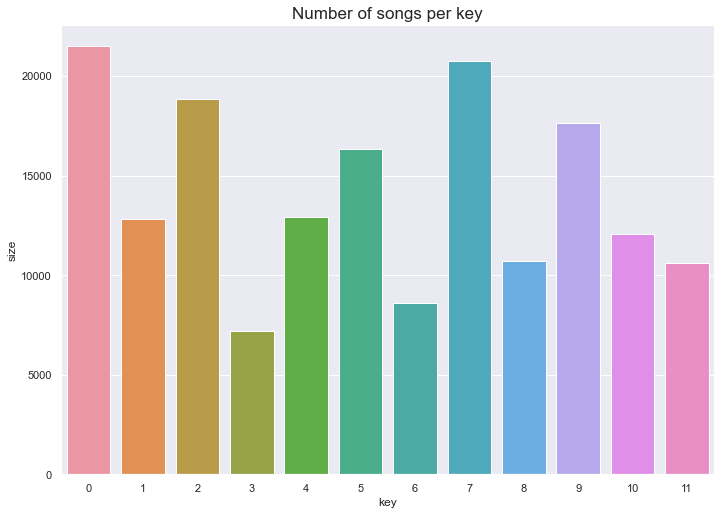

In [27]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

We see a fluctuation across the different keys and the number of songs produced, with no certain pattern in the key number and the number of songs produced. However, the highest number of songs produced have a key of 0, while the least number of songs are in key 4.

### Mode
Exploring the mode feature.

In [28]:
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)
df3

,mode,size
0,0,49519
1,1,120390


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per mode')

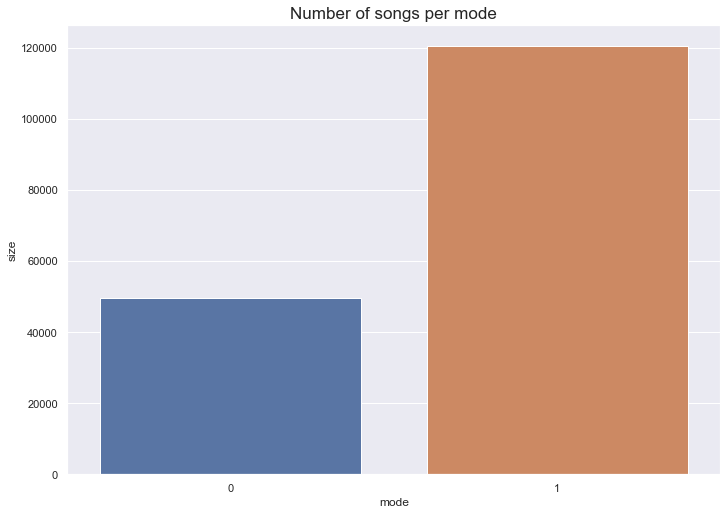

In [29]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

A significant majority of the tracks are produced in the major modality while a fewer number of songs belong to the minor modality.

### Explicit
Exploring the explicit feature.

In [30]:
df4 = df.groupby('explicit', as_index=False).size().sort_values(by='size',ascending=True)
df4

,explicit,size
1,1,14419
0,0,155490


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per explict rate')

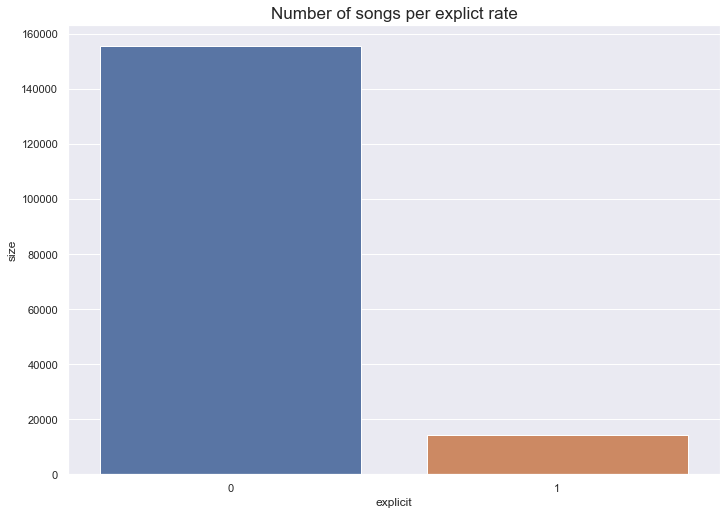

In [31]:
sns.barplot(x='explicit', y='size', data=df4).set_title("Number of songs per explict rate", fontsize=17)

A significantly larger number of were not labelled as explicit, as opposed to the number of songs that were labelled as explicit

### Year
Let's start by exploring the year feature.

In [32]:
print(df['year'].min())
print(df['year'].max())
df['year'].unique()

1921
2020


array([1928, 1930, 1935, 1936, 1940, 1942, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1929, 1931, 1932, 1933, 1934, 1937, 1938, 1939, 1941, 1943,
       1944])

In [33]:
df1 = df.groupby('year', as_index=False).size().sort_values(by='size',ascending=True)

Text(0.5, 1.0, 'Number of songs per Year')

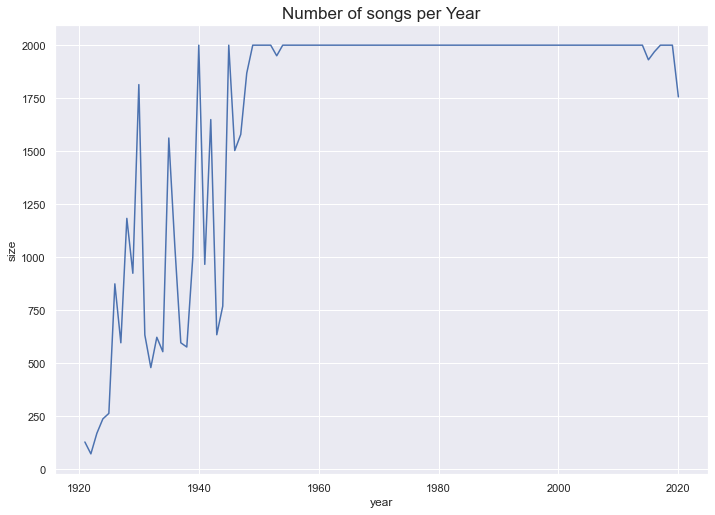

In [34]:
sns.lineplot(x='year', y='size', data=df1).set_title("Number of songs per Year", fontsize=17)

As the songs are spread across many different years, let's create year groups to allow  a better representation.

In [35]:
df1['Year Bin'] = pd.cut(df1['year'], bins = range(1920,2021,10))

In [36]:
df1.sample(5)

,year,size,Year Bin
81,2002,2000,"(2000, 2010]"
60,1981,2000,"(1980, 1990]"
12,1933,622,"(1930, 1940]"
73,1994,2000,"(1990, 2000]"
72,1993,2000,"(1990, 2000]"


Let's see how many songs we have in the dataset for each year group:

In [37]:
df1_yearbin = df1.groupby('Year Bin', as_index=False)['size'].sum()
df1_yearbin

,Year Bin,size
0,"(1920, 1930]",6260
1,"(1930, 1940]",9075
2,"(1940, 1950]",14968
3,"(1950, 1960]",19950
4,"(1960, 1970]",20000
5,"(1970, 1980]",20000
6,"(1980, 1990]",20000
7,"(1990, 2000]",20000
8,"(2000, 2010]",20000
9,"(2010, 2020]",19656


Transforming the information above into a visual representation using a barplot.

Text(0.5, 1.0, 'Number of songs per decade')

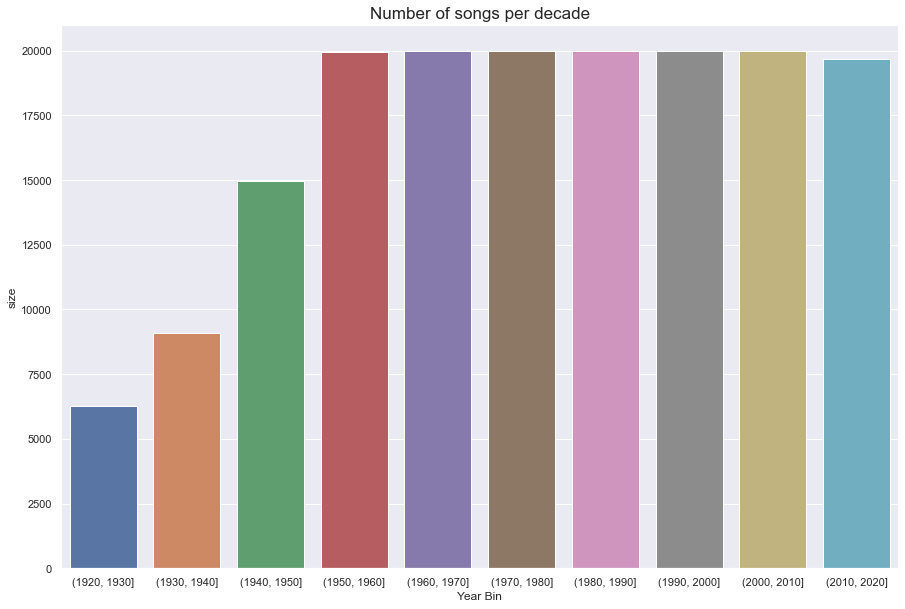

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year Bin', y='size', data=df1_yearbin).set_title("Number of songs per decade", fontsize=17)

From the representation, we cleary see that the number of songs in our dataset before 1940 were fewer and these rapidly increased to about 20,000 in 1950 and have been constant until 2000-2010. The umber of songs in our dataset decrease in the year group 2010-2020.

### Distributions for the rest of the continuous variables

### Popularity
Exploring the popularity feature through a visual representation using a distribution plot.

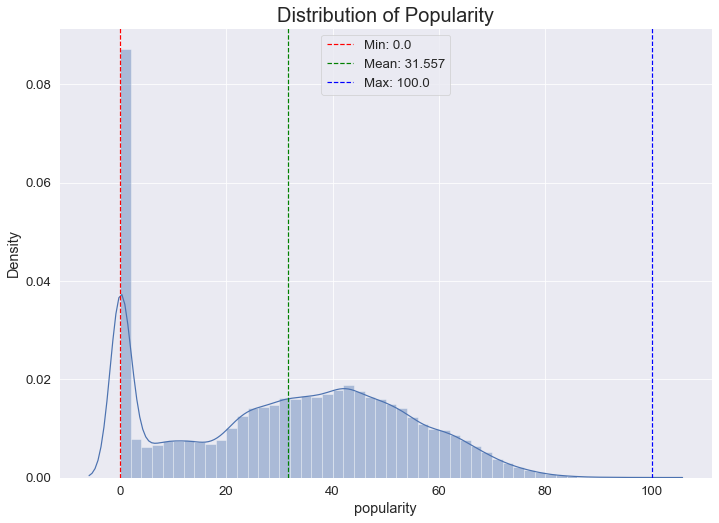

In [39]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Min: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Mean: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

As shown by the distribution above, the distribution of popularity has much fewer number of songs on the right of the halfway mark and significantly larger number of songs on the left. The popularity score with the largest density is 0, whereas the popularity score with the lowest number of density is between 85-100.

#### Multi class - 5 classes (new feature)

In [40]:
switcher = {}

for i in range(0, 21):
    switcher[i] = "Least Popular"
for i in range(21, 41): 
    switcher[i] = "Less Popular"
for i in range(41, 61): 
    switcher[i] = "Mildly Popular"
for i in range(61, 81): 
    switcher[i] = "More Popular"
for i in range(81, 101): 
    switcher[i] = "Most Popular"

In [41]:
def decide_class(txt):
    return switcher.get(int(txt))

In [42]:
df_numeric['multi_pop'] = df_numeric['popularity'].apply(decide_class)

In [43]:
df_numeric.sample(10)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,month,multi_pop
24208,0.077500,0.735,135373.0,0.5850,1,0.000007,0,0.0996,-5.111,0,66.0,0.2110,82.429,0.4470,2020,4,More Popular
105849,0.080600,0.516,165733.0,0.8020,0,0.000000,5,0.0988,-1.597,1,60.0,0.0403,109.770,0.7170,2006,1,Mildly Popular
157702,0.232000,0.827,158160.0,0.2180,0,0.000007,9,0.0390,-16.892,1,32.0,0.6440,131.588,0.5900,1983,1,Less Popular
133190,0.770000,0.401,177424.0,0.4610,0,0.000000,9,0.1650,-4.288,1,51.0,0.0506,199.297,0.7980,1997,6,Mildly Popular
203,0.701000,0.709,220488.0,0.1690,0,0.000000,4,0.3520,-20.818,1,0.0,0.9500,128.769,0.4490,1935,1,Least Popular
1809,0.844000,0.545,153667.0,0.1890,0,0.000000,0,0.1480,-11.986,0,17.0,0.0944,172.509,0.7650,1957,3,Least Popular
70588,0.994000,0.216,147000.0,0.0819,0,0.954000,9,0.0931,-26.170,1,68.0,0.0444,71.070,0.0911,2020,4,More Popular
33449,0.974000,0.664,142333.0,0.5660,0,0.068000,3,0.1200,-10.277,1,0.0,0.2330,130.510,0.9140,1953,12,Least Popular
76153,0.000211,0.394,229733.0,0.8680,0,0.000000,9,0.0952,-4.209,1,38.0,0.0384,113.605,0.3640,2001,5,Less Popular
110341,0.648000,0.230,217467.0,0.1330,0,0.003010,4,0.3600,-20.018,1,28.0,0.0394,126.395,0.1590,1957,1,Less Popular


In [44]:
df_numeric['multi_pop'] = df_numeric['multi_pop'].astype('category')

In [45]:
df_numeric.multi_pop.dtype

CategoricalDtype(categories=['Least Popular', 'Less Popular', 'Mildly Popular',
                  'More Popular', 'Most Popular'],
, ordered=False)

In [46]:
df4_5 = df_numeric.groupby('multi_pop', as_index=False).size()
df4_5

,multi_pop,size
0,Least Popular,53188
1,Less Popular,51836
2,Mildly Popular,49268
3,More Popular,15160
4,Most Popular,457


Text(0.5, 1.0, 'Number of songs per popularity category')

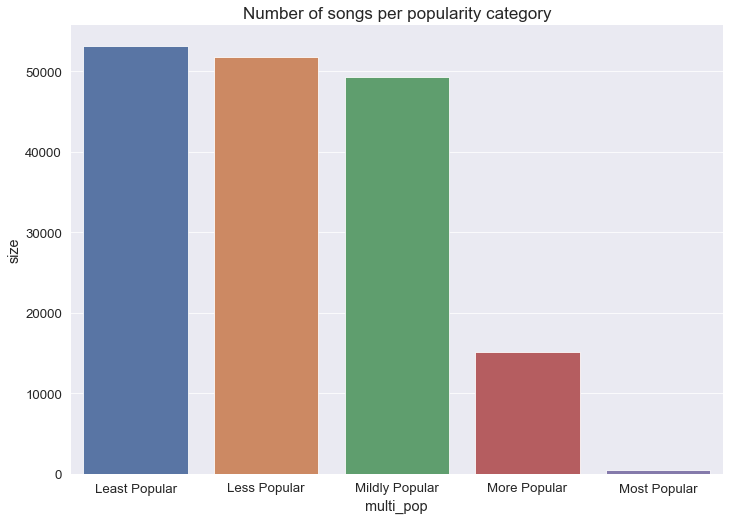

In [47]:
sns.barplot(x='multi_pop', y='size', data=df4_5).set_title("Number of songs per popularity category", fontsize=17)

#### Bin_plot (new feature)

Creating a new feature that represents population through a binary value with a split at 35. We chose 35 as the threshold as this value is close to the mean value of population (as represented in the distribution above). This feature will be helpful later in the modelling section.

In [48]:
df_numeric['bin_pop'] = df_numeric['popularity'].apply(lambda x: 0 if int(x)<35 else 1)

In [49]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,month
73441,0.158,['Chris LeDoux'],0.381,206240.0,0.295,0,0.000614,7,0.0912,-15.536,1,Horses And Cattle,17.0,1974-01-01,0.0632,173.906,0.409,1974,1
91748,0.719,"['Mel Tormé', 'The Marty Paich Orchestra']",0.600,245800.0,0.156,0,0.000000,5,0.0959,-16.074,0,Too Close For Comfort,35.0,1960-01-01,0.0881,143.559,0.467,1960,1
50133,0.861,['Donovan'],0.377,109373.0,0.348,0,0.905000,0,0.1120,-15.424,0,Tangerine Puppet,20.0,1965-05-14,0.0462,107.371,0.682,1965,5
42171,0.712,['Ben E. King'],0.289,148040.0,0.514,0,0.008330,0,0.4160,-10.416,1,Granada,14.0,1961-01-01,0.0380,146.344,0.664,1961,1
63559,0.984,['Chitragupta'],0.726,204103.0,0.297,0,0.000002,6,0.3810,-9.291,0,Maat Pita Ki Seva Karke,0.0,1949-12-31,0.1330,141.325,0.764,1949,12
19149,0.577,['Four Tops'],0.607,173267.0,0.426,0,0.016200,5,0.1550,-14.322,1,Everybody's Talking,30.0,1970-01-01,0.0329,113.260,0.554,1970,1
88492,0.990,"['Francisco Canaro', 'Agustín Irusta']",0.792,171520.0,0.333,0,0.260000,9,0.1150,-14.740,0,Queja Indiana - Remasterizado,0.0,1927-09-11,0.0698,115.016,0.648,1927,9
59480,0.192,['Elvis Costello & The Attractions'],0.636,168467.0,0.801,0,0.000000,9,0.0722,-7.271,1,The Loved Ones,24.0,1982-01-01,0.0311,132.921,0.860,1982,1
94025,0.174,['Van Halen'],0.544,184893.0,0.951,0,0.000000,9,0.0249,-3.974,1,Where Have All the Good Times Gone! - 2015 Rem...,46.0,1982-04-14,0.0597,122.015,0.620,1982,4
136255,0.848,"['Ludwig van Beethoven', 'Arturo Toscanini']",0.406,417800.0,0.256,0,0.732000,0,0.3700,-14.614,1,"Symphony No. 8 in F Major, Op. 93: IV. Allegro...",0.0,1939-01-01,0.0447,73.984,0.465,1939,1


In [50]:
df4_4 = df_numeric.groupby('bin_pop', as_index=False).size().sort_values(by='size',ascending=True)
df4_4

,bin_pop,size
1,1,82152
0,0,87757


Representing this new feature through a barplot.

Text(0.5, 1.0, 'Number of songs per popularity bin')

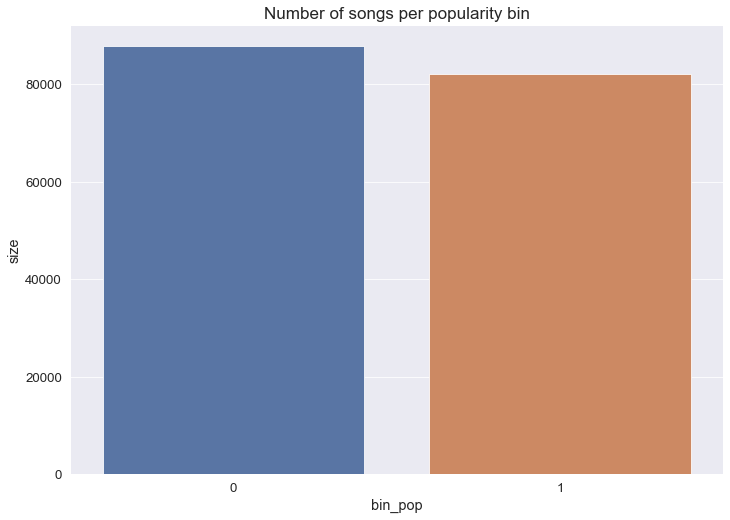

In [51]:
sns.barplot(x='bin_pop', y='size', data=df4_4).set_title("Number of songs per popularity bin", fontsize=17)

As we split the bins close to the mean value of the popularity distribution, both popular and non-popular sizes (represented by 1 and 0 respectively) are close together.

### Tempo
Exploring the tempo feature through a visual representation using a distribution plot.

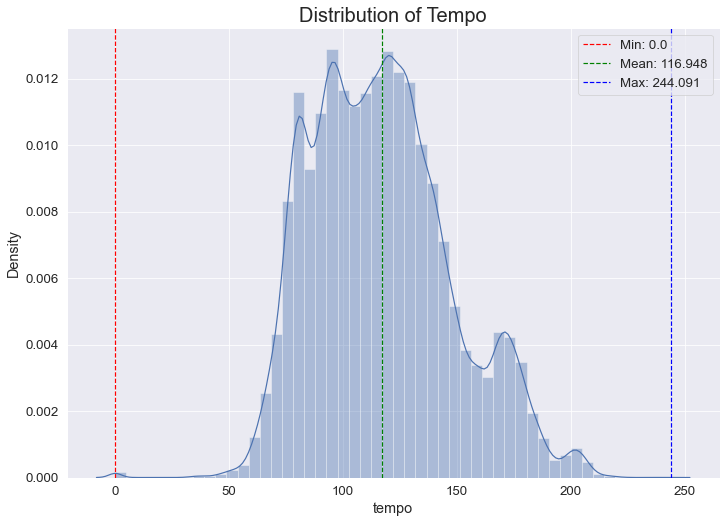

In [52]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Min: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Mean: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

Most of the songs have an average tempo between 80-120 and having fewer songs at either ends of the tempo range.

### Acousticness
Exploring the acousticness feature through a visual representation using a distribution plot. 

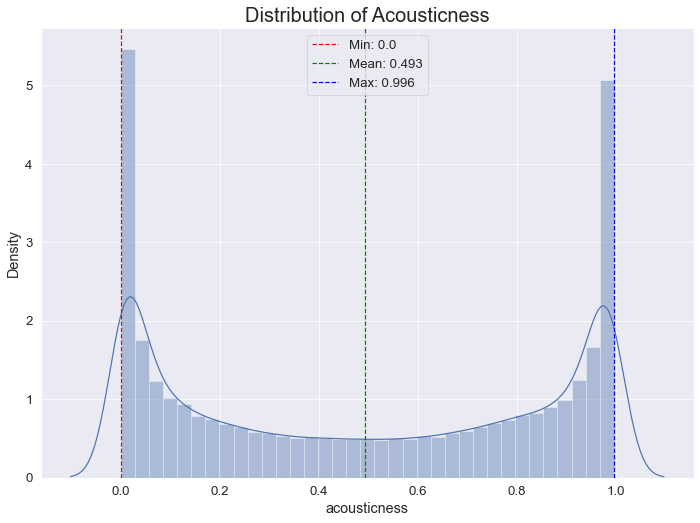

In [53]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Min: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Mean: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The acousticness distribution is represents an upside down bell curve, with the highest distribution being at either ends of the acousticness range and lowest distribution being near the middle of the range. This shows us that most songs are either acoustic or not, with slightly more songs not being acoustic.

### Instrumentalness
Exploring the instrumentalness feature through a visual representation using a distribution plot.

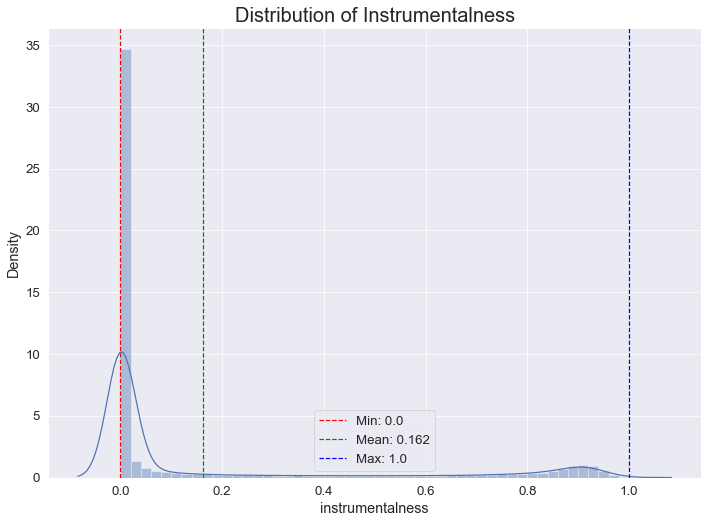

In [54]:
sns.distplot(df.instrumentalness).set_title("Distribution of Instrumentalness", fontsize=20)
plt.axvline(df.instrumentalness.min(), 0,1, label="Min: " + str(df.instrumentalness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.instrumentalness.mean(), 0,1, label="Mean: " + str(round(df.instrumentalness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.instrumentalness.max(), 0,1, label="Max: " + str(df.instrumentalness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The instrumentalness distribution shows us that most of the songs in the dataset are not instrumental. Another small peak at the opposite end of the distribution shows us that are are a bunch of songs that are mostly instrumental.

### Speechiness
Exploring the speechiness feature through a visual representation using a distribution plot.

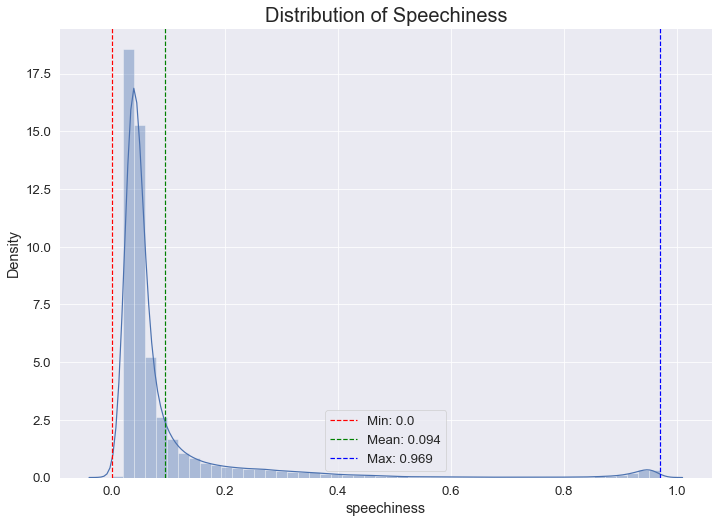

In [55]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Min: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Mean: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The speechiness distribution is extremely skewed to the left with a majority of the songs containing much fewer words. As the value of speechiness increases, the distribution of songs decreases.

### Valence
Exploring the valence feature through a visual representation using a distribution plot.

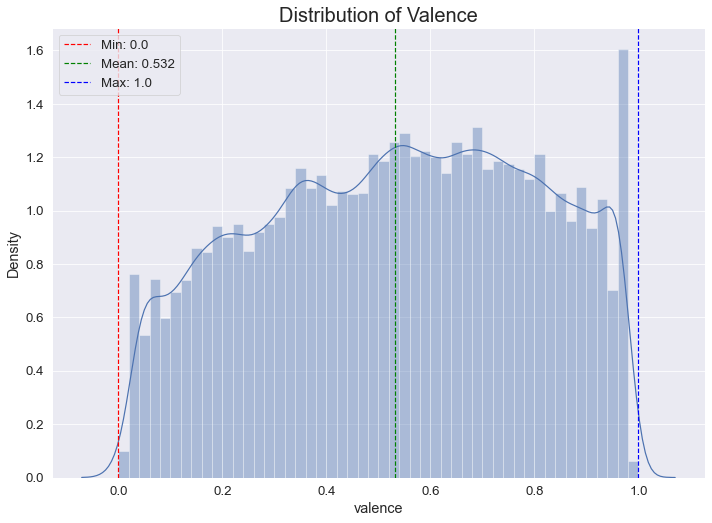

In [56]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Min: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Mean: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

The distribution of valence is more unformly distributed than than the other features so far. There is an anamolous value that peaks at a valence of 0.98.

### Danceability
Exploring the danceability feature through a visual representation using a distribution plot.

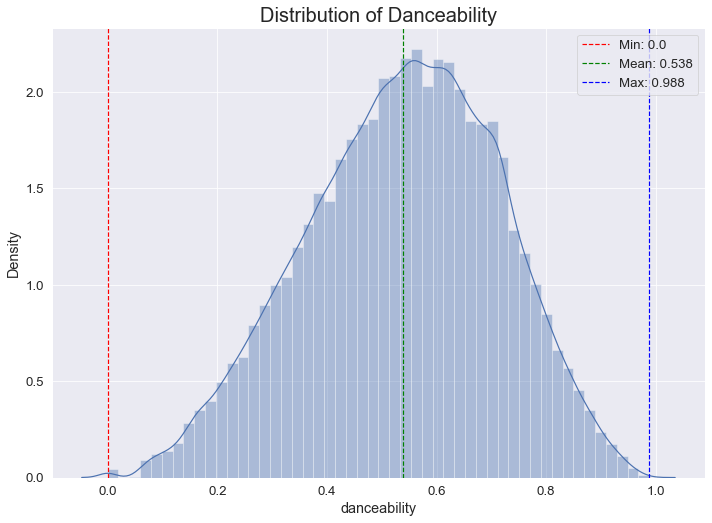

In [57]:
sns.distplot(df.danceability).set_title("Distribution of Danceability", fontsize=20)
plt.axvline(df.danceability.min(), 0,1, label="Min: " + str(df.danceability.min()), color = 'red', linestyle='dashed')
plt.axvline(df.danceability.mean(), 0,1, label="Mean: " + str(round(df.danceability.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.danceability.max(), 0,1, label="Max: " + str(df.danceability.max()), color = 'blue', linestyle='dashed')
plt.legend()

The danceability distribution represents a good bell curve with the mean value being very close to the middle value of the range. Most of the songs have a danceability between 0.4 and 0.8.

### Energy
Exploring the energy feature through a visual representation using a distribution plot.

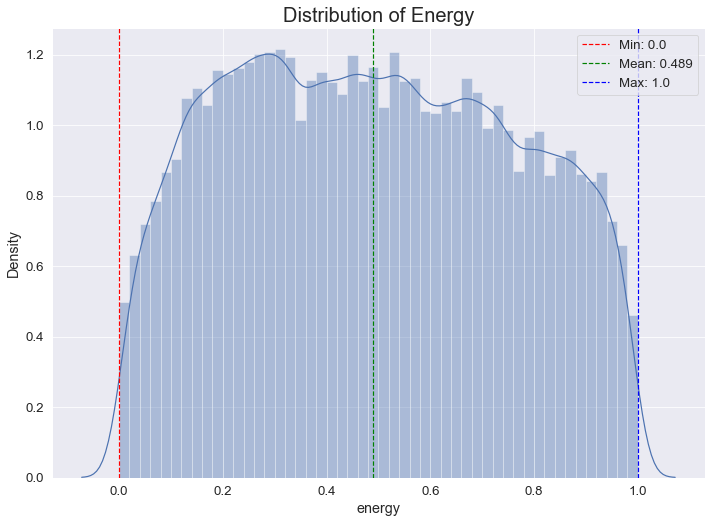

In [58]:
sns.distplot(df.energy).set_title("Distribution of Energy", fontsize=20)
plt.axvline(df.energy.min(), 0,1, label="Min: " + str(df.energy.min()), color = 'red', linestyle='dashed')
plt.axvline(df.energy.mean(), 0,1, label="Mean: " + str(round(df.energy.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.energy.max(), 0,1, label="Max: " + str(df.energy.max()), color = 'blue', linestyle='dashed')
plt.legend()

The energy distribution represents a more unifrom spread with a gradual peak at 0.2 that fluctuates until 0.6. Our dataset contains songs with a good range of different energy measures.

### Liveness
Exploring the liveness feature through a visual representation using a distribution plot.

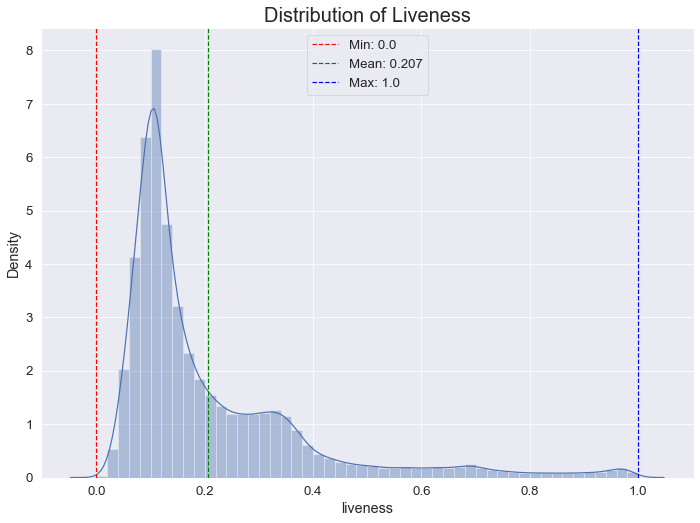

In [59]:
sns.distplot(df.liveness).set_title("Distribution of Liveness", fontsize=20)
plt.axvline(df.liveness.min(), 0,1, label="Min: " + str(df.liveness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.liveness.mean(), 0,1, label="Mean: " + str(round(df.liveness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.liveness.max(), 0,1, label="Max: " + str(df.liveness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The liveness distribution is skewed to the left. This means that most of the songs were not performed in front of an audience. As the liveness score increases, the number of songs decreases, meaning that fewer of the songs were performed in front of a larger audience.

### Loudness
Exploring the loudness feature through a visual representation using a distribution plot.

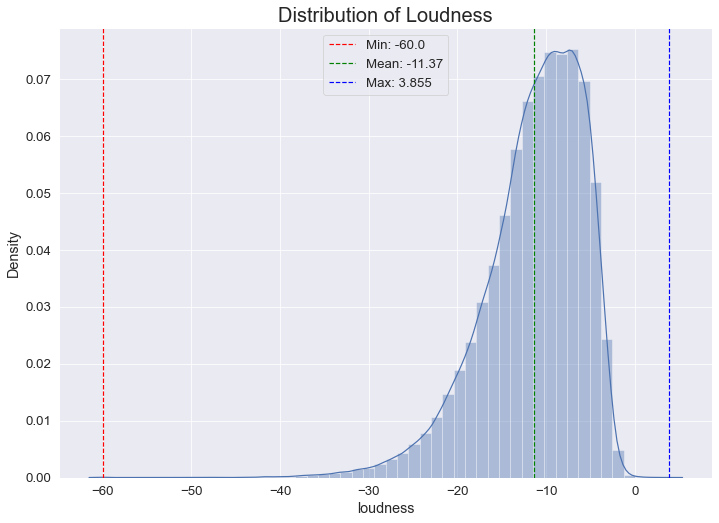

In [60]:
sns.distplot(df.loudness).set_title("Distribution of Loudness", fontsize=20)
plt.axvline(df.loudness.min(), 0,1, label="Min: " + str(df.loudness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.loudness.mean(), 0,1, label="Mean: " + str(round(df.loudness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.loudness.max(), 0,1, label="Max: " + str(df.loudness.max()), color = 'blue', linestyle='dashed')
plt.legend()

The loudness distribution is skewed towards the right with a majority of the songs having a loudness between -15 to -5 db. 

### Duration
Exploring the duration feature through a visual representation using a distribution plot.

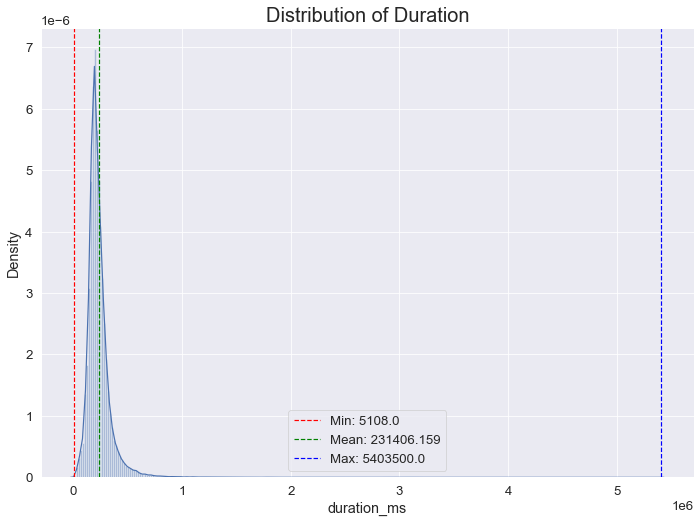

In [61]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

As the majority of the songs have a much lower duration time, shown by the extreme left skewness of the distribution, let's zoom in on this area to get a better understanding of the representation.

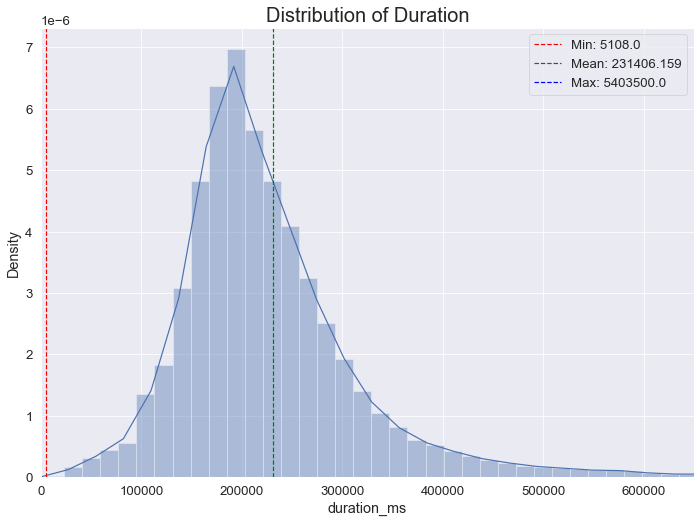

In [62]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Min: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Mean: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

The duration distribution is extremely skewed to the left (as seen the first distribution) with a majority of the songs being very short.

### Artists
Exploring the artist feature.
The artist names for each song in our dataset are stored in a list. This is because some songs are produced by more than one artists. However, this makes it difficult for us to analyse ou data fo different artists. 

In [63]:
df["artists"]

0                              ['Carl Woitschach']
1         ['Robert Schumann', 'Vladimir Horowitz']
2                          ['Seweryn Goszczyński']
3                             ['Francisco Canaro']
4         ['Frédéric Chopin', 'Vladimir Horowitz']
                            ...                   
169904                      ['DripReport', 'Tyga']
169905          ['Leon Bridges', 'Terrace Martin']
169906                       ['Kygo', 'Oh Wonder']
169907               ['Cash Cash', 'Andy Grammer']
169908                          ['Ingrid Andress']
Name: artists, Length: 169909, dtype: object

We need to remove the artist names from lists while making sure the artist values are still atomic. To do this we separated multiple artists from songs that have more than one artist and created different entries for them.

In [64]:
all_artists = []
for i in df["artists"]: 
    i = eval(i) #convert string of list to list type
    for j in i:
        all_artists.append(j)
all_artists[:10]

['Carl Woitschach',
 'Robert Schumann',
 'Vladimir Horowitz',
 'Seweryn Goszczyński',
 'Francisco Canaro',
 'Frédéric Chopin',
 'Vladimir Horowitz',
 'Felix Mendelssohn',
 'Vladimir Horowitz',
 'Franz Liszt']

In [65]:
print(len(all_artists))

225456


In [66]:
artists_names = pd.DataFrame(all_artists, columns=['artist'])
artists_names = artists_names.groupby('artist')['artist'].count().reset_index(name="song_count")
artists_names= pd.DataFrame(artists_names.sort_values(by="song_count",  ascending=False))
artists_names

,artist,song_count
8039,Francisco Canaro,2234
27525,Эрнест Хемингуэй,1215
8298,Frédéric Chopin,1035
14826,Ludwig van Beethoven,976
26605,Wolfgang Amadeus Mozart,938
...,...,...
14300,Livingston Taylor,1
14302,"Liz Callaway, Howard McGillin, David Zippel, L...",1
14303,Liz Damon's Orient Express,1
2365,Bernard Leighton,1


Now time to represent the artists and the number of songs produced by them viually through a bar plot. However, since the number of artists in our dataset is too large (over 27,000)and we can't represent all them them in a meaningful manner, we will only represent artists that have over 500 songs.

In [67]:
artists_with_more_than_500_songs = artists_names[artists_names['song_count']>500]

<AxesSubplot:xlabel='artist', ylabel='song_count'>

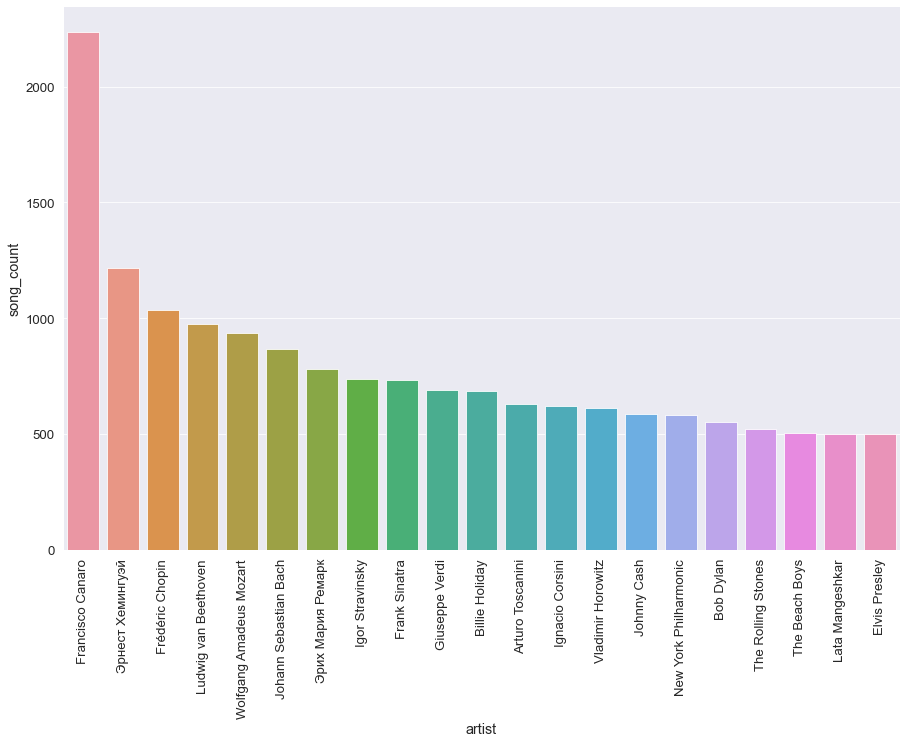

In [68]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x="artist", y="song_count", data=artists_with_more_than_500_songs)

Most of the artists, who have produced over 500 songs, have mostly produced between 500-1000 songs. However, one artist that has produced a significantly greater number of songs and stands out in the representation is Franscisco Canaro with over 2200 songs.

### Feature Trends with Time

Let's now observe the the different song feature trends over the span of different years represented through line plots.
We will do this by grouping the different features by year.

Code taken from: https://www.kaggle.com/richardcsuwandi/spotify-time-series-analysis/notebook 

In [69]:
year_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("year").mean().sort_values(by="year").reset_index()

year_avg.sample(10)

,year,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,duration_ms,popularity
64,1985,0.278964,0.558500,0.611724,0.108348,0.199534,121.994825,0.570587,-11.178366,0.057891,251831.435000,36.578500
33,1954,0.867919,0.466630,0.259361,0.278372,0.219946,108.532237,0.446452,-15.594470,0.115995,222630.231000,7.083500
47,1968,0.488828,0.500480,0.456669,0.111797,0.217911,116.488288,0.566766,-12.178926,0.060098,217330.871500,30.915500
99,2020,0.247374,0.673077,0.611914,0.039052,0.177048,121.228704,0.482755,-7.204024,0.143505,197114.662301,63.111048
3,1924,0.935575,0.548654,0.347033,0.583955,0.237875,120.653359,0.668574,-14.202304,0.090210,188461.649789,0.603376
12,1933,0.905011,0.603766,0.287361,0.130556,0.210155,115.053682,0.635153,-12.768765,0.096171,192454.038585,7.069132
73,1994,0.288334,0.559391,0.590628,0.107491,0.193089,118.436386,0.536973,-10.080787,0.078141,252177.566500,44.379500
70,1991,0.315968,0.561228,0.566022,0.108994,0.190251,119.776355,0.554227,-10.835189,0.073707,244292.828000,41.210000
93,2014,0.237614,0.589574,0.653497,0.058543,0.190084,122.584669,0.464599,-6.957376,0.084671,231953.446000,56.964500
26,1947,0.915399,0.472399,0.258911,0.344697,0.220693,109.272361,0.506145,-14.593787,0.100910,232983.251425,1.161495


#### Acousticness, Intrumentalness, Valence and Speechiness Over Time

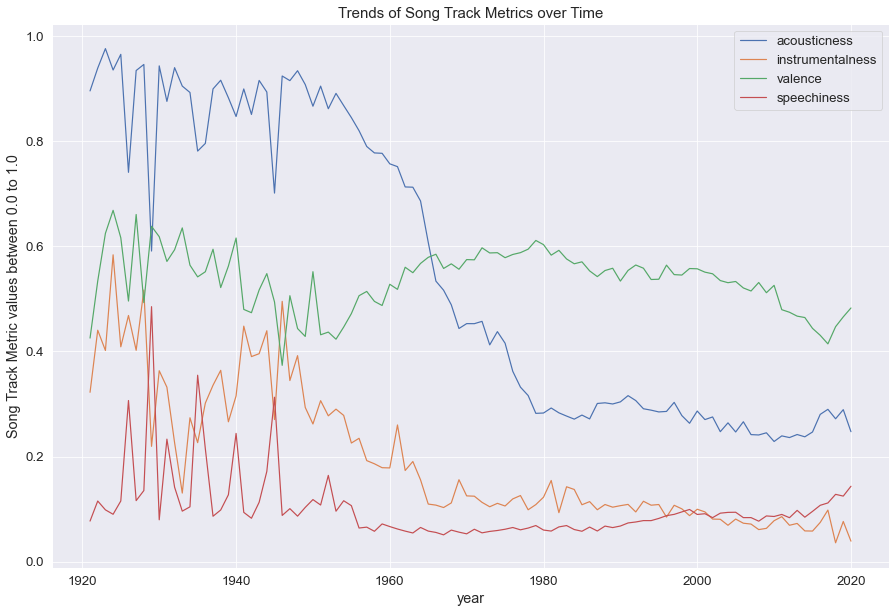

In [70]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Track Metrics over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
plt.ylabel("Song Track Metric values between 0.0 to 1.0")
plt.legend(lines)

Throughout the years (1920-2020) the trend of:
- acousticness in songs has decreased significantly. This means that newer songs have more vocals than older songs.
- instrumentalness in songs has decreased. Meaning that newer songs are not as instrumental as older songs.
- valence in songs has decreased slightly. Menaing that the musical positiveness conveyed by newer tracks is slightly lower.
- speechiness in songs has decreased slightly. Menaing that newer songs have slightly fewer lyrics.

#### Energy, Danceability and Liveness Over Time

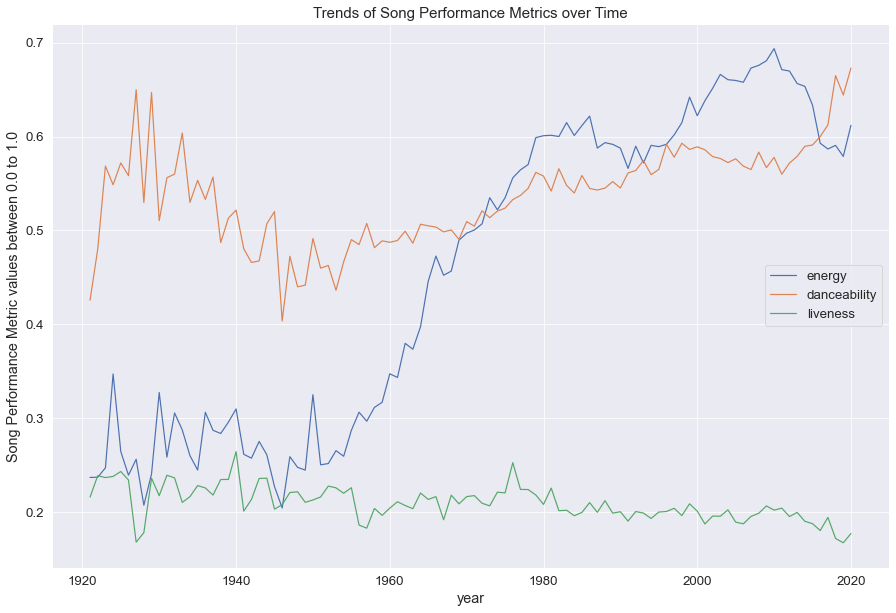

In [71]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Performance Metrics over Time", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy", "danceability", "liveness"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
    
plt.ylabel("Song Performance Metric values between 0.0 to 1.0")
plt.legend(lines)

Throughout the years (1920-2020) the trend of:
- energy in songs has increased significantly. This means that newer songs are far more more energetic (they have faster beats and are louder).
- danceability in songs shows a dip in the 1960 but has rised to its highestin 2020. Newer songs are slightly more danceable than the songs of 1920. 
- liveness in songs has decreased slightly. This means that fewer songs are performed live now.

####  Popularity Over Time

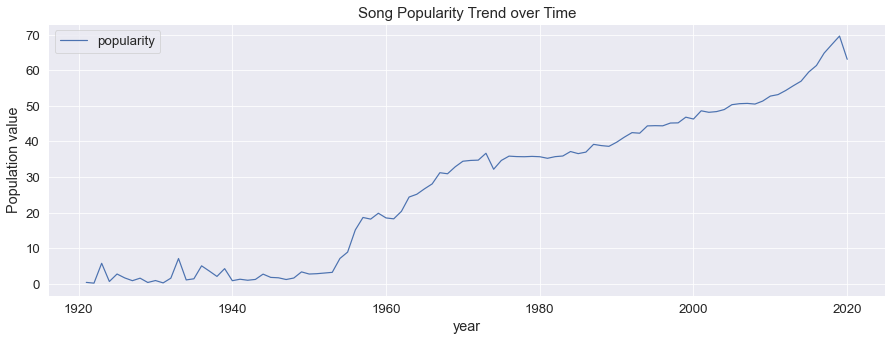

In [72]:
plt.figure(figsize=(15,5))
plt.title("Song Popularity Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='popularity', data=year_avg)
    
    
plt.ylabel("Population value")
plt.legend(['popularity'])

The general trend shows that newer songs are far more popular than older songs.

#### Song Duration Over Time

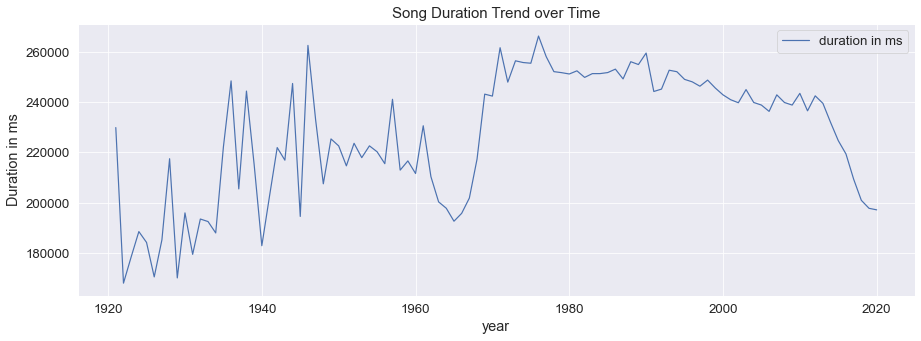

In [73]:
plt.figure(figsize=(15,5))
plt.title("Song Duration Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='duration_ms', data=year_avg)
    
    
plt.ylabel("Duration in ms")
plt.legend(['duration in ms'])

There is a lot of fluctuation between the lengths of songs across the years. Songs in 1978 were on average the longest and songs in 1922 were on average the shortest. Songs in 2020 are much shorter than in the early 2000's.

#### Song Tempo Over Time

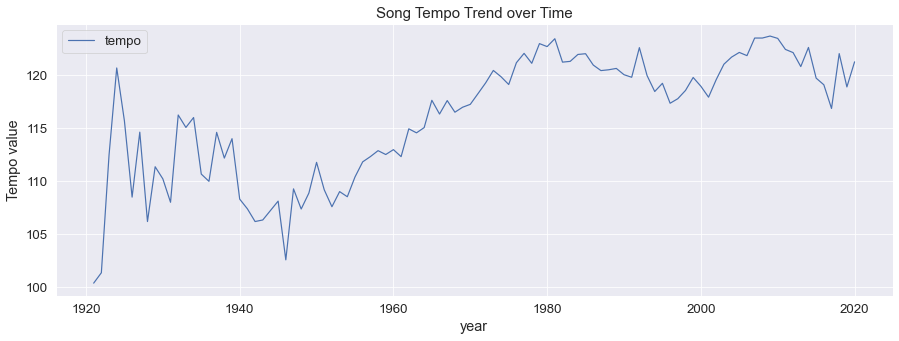

In [74]:
plt.figure(figsize=(15,5))
plt.title("Song Tempo Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='tempo', data=year_avg)
    
    
plt.ylabel("Tempo value")
plt.legend(['tempo'])

The overall trend of tempo in songs has increased over time. There was a sudden rise in average tempo from the year 1920 to 1925 and a sudden drop to the lowest tempo in the year 1944.

#### Loudness Over Time

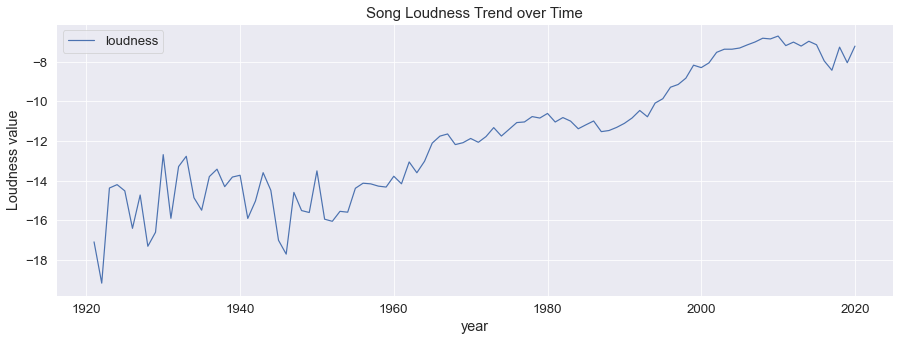

In [75]:
plt.figure(figsize=(15,5))
plt.title("Song Loudness Trend over Time", fontdict={"fontsize": 15})

ax = sns.lineplot(x='year', y='loudness', data=year_avg)
    
    
plt.ylabel("Loudness value")
plt.legend(['loudness'])

The loudness of songs over the years has increased on average.

### Feature Trends with Popularity

Let's now observe the the different song features against popularity trends represented thorugh line plots. We will do this by grouping the different features by popularity. This is significant for our analysis as out question depends particularily of the popularity of songs.

In [76]:
pop_avg = df[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness","speechiness", 
               "year",'duration_ms', 'popularity']].groupby("popularity").mean().sort_values(by="popularity").reset_index()

pop_avg.sample(10)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,tempo,valence,loudness,speechiness,year,duration_ms
0,0.0,0.867570,0.494920,0.262413,0.343883,0.225819,108.203914,0.511625,-15.314667,0.177562,1941.726395,215055.212999
4,4.0,0.871332,0.487428,0.273987,0.313071,0.204773,111.942562,0.481161,-14.716422,0.078281,1947.598696,206611.655493
32,32.0,0.398215,0.526918,0.534664,0.137229,0.217242,119.252347,0.548458,-11.551222,0.067335,1979.170236,240713.857350
33,33.0,0.374199,0.535521,0.545826,0.125009,0.205651,119.487515,0.562937,-11.307556,0.066813,1980.893458,242295.537196
14,14.0,0.750607,0.493323,0.338477,0.209529,0.207650,113.333322,0.524201,-13.965744,0.074658,1957.904247,211457.626255
51,51.0,0.286093,0.568778,0.624861,0.083369,0.188777,121.147930,0.534814,-8.493854,0.076990,1998.733851,241983.600981
85,85.0,0.307664,0.705167,0.614944,0.005430,0.159119,125.679194,0.486869,-5.929694,0.091650,2018.694444,203556.944444
77,77.0,0.242664,0.663859,0.644057,0.017654,0.175023,120.001745,0.528621,-6.506247,0.106228,2011.222672,211646.748988
3,3.0,0.864674,0.492906,0.284152,0.308838,0.210646,110.726850,0.492102,-14.461250,0.087737,1945.285833,204865.135000
39,39.0,0.330102,0.551398,0.585326,0.110733,0.204086,120.527255,0.560148,-10.077653,0.076243,1988.275105,246218.011158


#### Acousticness, Intrumentalness, Valence and Speechiness Against Popularity

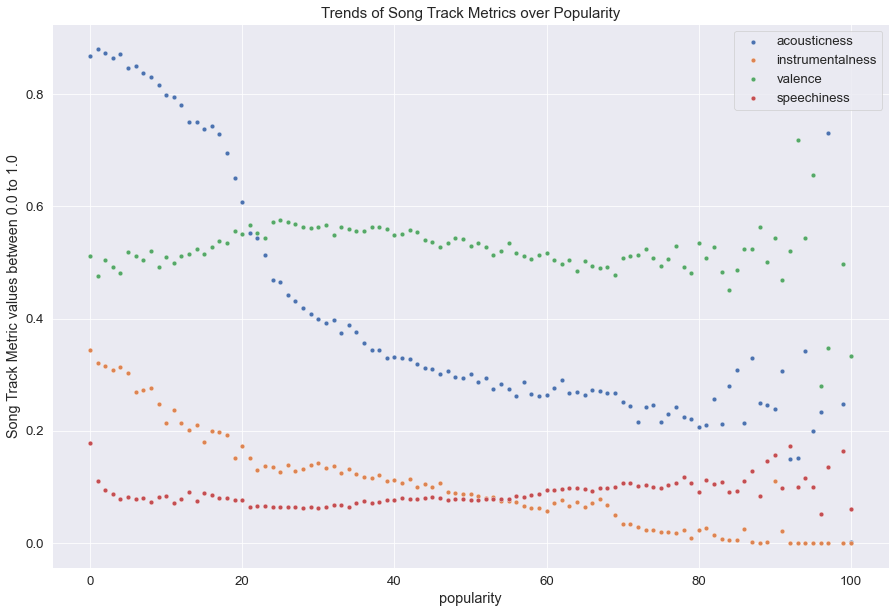

In [77]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Track Metrics over Popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["acousticness","instrumentalness", "valence", "speechiness"]

for line in lines:
    ax = sns.scatterplot(x='popularity', y=line, data=pop_avg)
    
plt.ylabel("Song Track Metric values between 0.0 to 1.0")
plt.legend(lines)

- lower acousticness leads to songs with a higher popularity.
- lower instrumentalness leads to songs with a higher popularity. 
- valence around 0.5 is the average and shows no significant trend for song popularity.
- speechiness shows no significant trend in song popularity.

#### Energy, Danceability and Liveness Against Popularity

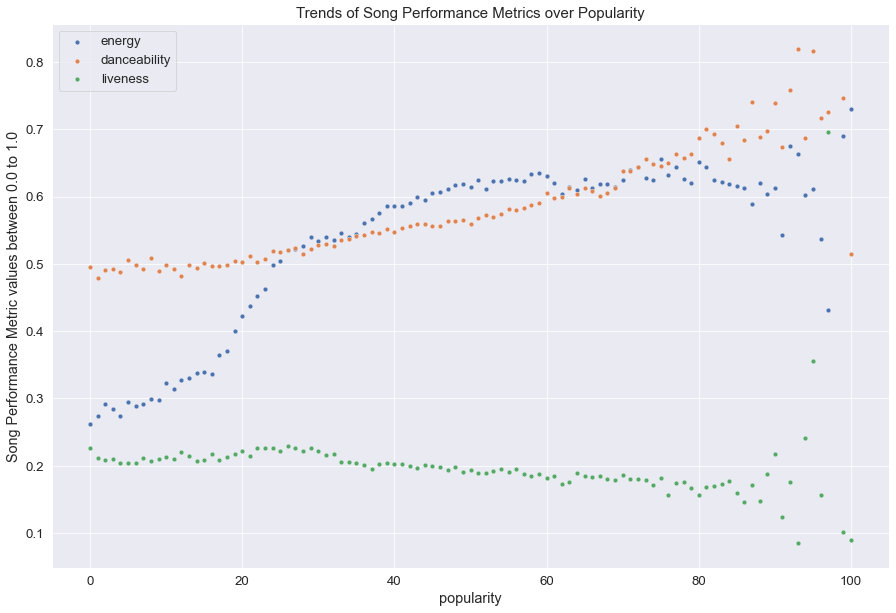

In [78]:
plt.figure(figsize=(15,10))
plt.title("Trends of Song Performance Metrics over Popularity", fontdict={"fontsize": 15})
#all these within 0.0 to 1.0 range values
lines = ["energy","danceability", "liveness"]

for line in lines:
    ax = sns.scatterplot(x='popularity', y=line, data=pop_avg)
    
plt.ylabel("Song Performance Metric values between 0.0 to 1.0")
plt.legend(lines)

- on average, more energetic songs show higher popularity.
- on average, songs with a higher danceability show higher popularity.
- on average, songs that are not live show higher popularity.

#### Song Duration Over Popularity

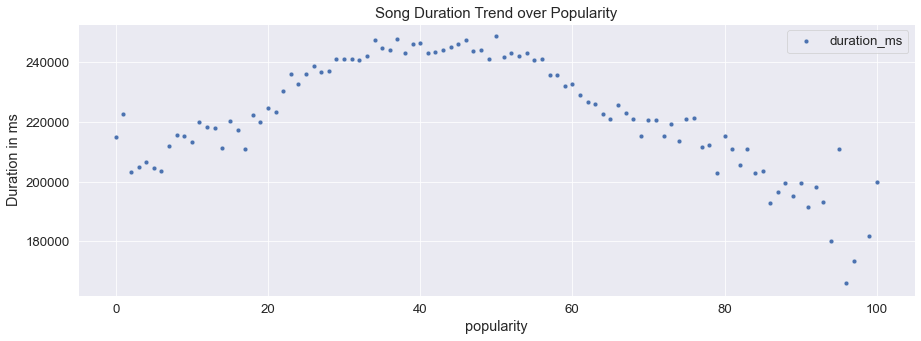

In [79]:
plt.figure(figsize=(15,5))
plt.title("Song Duration Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.scatterplot(x='popularity', y='duration_ms', data=pop_avg)
    
    
plt.ylabel("Duration in ms")
plt.legend(['duration_ms'])

Here, we can observe that more popular song tend to have less song duration. 

#### Song Tempo Against Popularity

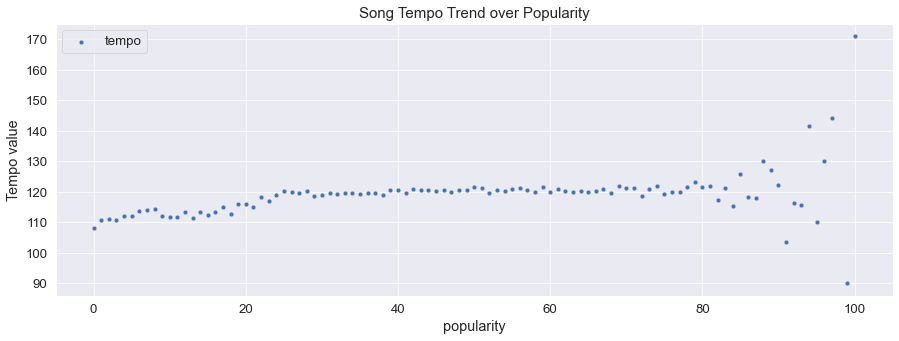

In [80]:
plt.figure(figsize=(15,5))
plt.title("Song Tempo Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.scatterplot(x='popularity', y='tempo', data=pop_avg)
    
    
plt.ylabel("Tempo value")
plt.legend(['tempo'])

On average, most songs have a tempo around 120...

#### Loudness Against Popularity

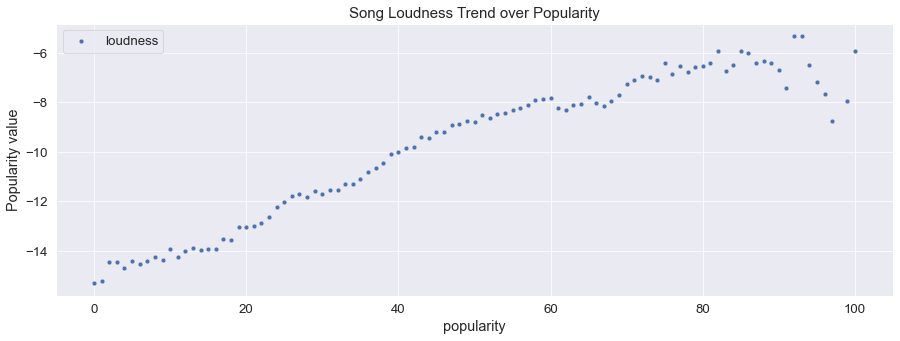

In [81]:
plt.figure(figsize=(15,5))
plt.title("Song Loudness Trend over Popularity", fontdict={"fontsize": 15})

ax = sns.scatterplot(x='popularity', y='loudness', data=pop_avg)
    
    
plt.ylabel("Popularity value")
plt.legend(['loudness'])

On average, loud songs have higher popularity.

### General Relationships
We will now explore the general replationships between the different features by looking at the correlations values.

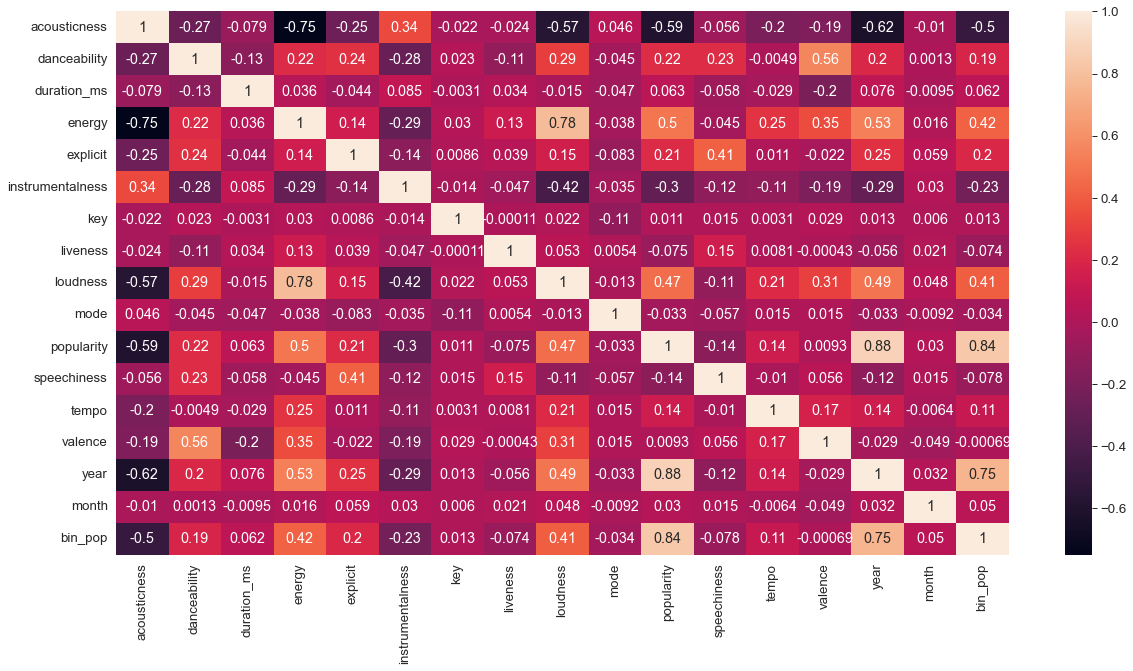

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

While many of the features above indicate a no or small correlation with each other, some of them stand out with strong correlations. <br> <br>
Out of all variables, *acousticness, danceability, energy, loudness, popularity, valence and year* show some significant correlations. <br>Danceability & valence show a comparatively stronger positive relationship with each other and that is their only significant correlation. <br> 
Now, the rest of the variables from the selected ones are: acousticness, energy, loudness, popularity, and year
- Acousticness has strong negative correlations with the rest of the 4 features.  
- Energy and Loudeness features have strong positive correlations with with other and reasonable positive correlations with popularity and year variables. They also have strong negative correlations with acousticness.
- Popularity and Year features have strong positive correlation with each other. They have reasonable positive correlations with energy and loudness variables. They have a negative correlation with acousticness. 


So, in terms of popularity, from all the exploratory analysis and the correlations derived from this heatmap, we can deduce that <br>the 4 variables: **acousticness, energy, loudness,and year have the most impact on popularity**.

## Models and Prediction

### Regression

In [83]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:06:41   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [84]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:06:42   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Decision Trees Multiclass

In [85]:
clf = DecisionTreeClassifier()

In [86]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [87]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
y_pred = clf.predict(x_test)

In [89]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.recall_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.16361603201695016
0.16550081430833788
0.16361603201695016
0.1645039409969594


### Random Forest Multiclass

In [90]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy')

In [91]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [92]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [93]:
y_pred = rfc.predict(x_test)

In [94]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.19913483608969454
Precision ->  0.15688939644846245
Recall    ->  0.19913483608969454
F1 Score  ->  0.17159173406566347


### Decision Trees Multiclass (restricted)

In [95]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['multi_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [96]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
y_pred = clf.predict(x_test)

In [98]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="weighted"))
print(metrics.recall_score(y_test,y_pred, average="weighted"))
print(metrics.f1_score(y_test,y_pred, average="weighted"))

0.655288093696663
0.656747651426215
0.655288093696663
0.6559764570282611


### Random Forest Multiclass

In [99]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['multi_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [100]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [101]:
y_pred = rfc.predict(x_test)

In [102]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.7501324230474957
Precision ->  0.7485491768716692
Recall    ->  0.7501324230474957
F1 Score  ->  0.7441895216906803


### Decision Trees Binary

In [103]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [104]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [105]:
y_pred = clf.predict(x_test)

In [106]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test,y_pred, average="binary"))
print(metrics.recall_score(y_test,y_pred, average="binary"))
print(metrics.f1_score(y_test,y_pred, average="binary"))

0.8101053498911188
0.8057407407407408
0.7979094076655052
0.8018059522712614


### Random Forest Binary

In [107]:
X = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
Y = df_numeric['bin_pop']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [108]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [109]:
y_pred = rfc.predict(x_test)

In [110]:
print("Accuracy  -> ", metrics.accuracy_score(y_test, y_pred))
print("Precision -> ", metrics.precision_score(y_test,y_pred, average="weighted"))
print("Recall    -> ",metrics.recall_score(y_test,y_pred, average="weighted"))
print("F1 Score  -> ",metrics.f1_score(y_test,y_pred, average="weighted"))

Accuracy  ->  0.850155964922606
Precision ->  0.8509180287978958
Recall    ->  0.850155964922606
F1 Score  ->  0.8498876380330282


### Feature Importance

In [111]:
features = df_numeric.drop(columns=['popularity', 'bin_pop', 'multi_pop'])
feature_list = list(features.columns)

In [112]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: year                 Importance: 0.4
Variable: acousticness         Importance: 0.1
Variable: loudness             Importance: 0.09
Variable: duration_ms          Importance: 0.05
Variable: energy               Importance: 0.05
Variable: speechiness          Importance: 0.05
Variable: danceability         Importance: 0.04
Variable: instrumentalness     Importance: 0.04
Variable: liveness             Importance: 0.04
Variable: tempo                Importance: 0.04
Variable: valence              Importance: 0.04
Variable: key                  Importance: 0.02
Variable: month                Importance: 0.02
Variable: explicit             Importance: 0.01
Variable: mode                 Importance: 0.0


### Ranker

In [113]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

In [114]:
x_train.shape

(115537, 15)

In [115]:
query_train = [x_train.shape[0]]
query_val = [x_val.shape[0]]
query_test = [x_test.shape[0]]

In [116]:
params = {
    'objective': 'lambdarank',
    'metric': ['precision', 'ndcg'],   
    'num_leaves': 80,
}

In [117]:
gbm = lgb.LGBMRanker(**params)

NameError: name 'lgb' is not defined

In [ ]:
# gbm.fit(
#         X = x_train, 
#         y = y_train, 
#         group=query_train,
#         eval_set=[(x_val, y_val)], 
#         eval_group=[query_val],
#         eval_at=10, 
#         early_stopping_rounds=30)